In [102]:
import snap
import random
import matplotlib.pyplot as plt

In [132]:
##社交网络的基本属性

G = snap.LoadEdgeList(snap.PUNGraph, "Email-Enron.txt", 0, 1)
# snap.DrawGViz(G, snap.gvlDot, "wiki-Vote.png", "wiki-Vote")
# snap.PlotClustCf(G, "wiki-Vote-ClustCf", "wiki-Vote-ClustCf")
# snap.PlotOutDegDistr(Graph, "example", "Directed graph - out-degree Distribution")
# snap.PlotShortPathDistr(Graph, "example", "Directed graph - shortest path")

print "The number of nodes:", G.GetNodes()
print "The number of nodes with self-edges:" , snap.CntSelfEdges(G) 
print "The number of directed edges:", snap.CntUniqDirEdges(G)
print "The number of undirected edges:", snap.CntUniqUndirEdges(G)
print "The number of reciprocated edges:", snap.CntUniqBiDirEdges(G)
print "The number of nodes with zero out-degree:", snap.CntOutDegNodes(G, 0)
print "The number of nodes with zero in-degree:", snap.CntInDegNodes(G, 0)

# num = 0
# for n in G.Nodes():
#     if n.GetOutDeg() > 10:
#         num += 1
# print "The number of nodes with more than 10 outgoing edges:", num 

# num = 0
# for n in G.Nodes():
#     if n.GetInDeg() < 10:
#         num += 1
# print "The number of nodes with fewer than 10 outgoing edges:", num     

The number of nodes: 36692
The number of nodes with self-edges: 0
The number of directed edges: 367662
The number of undirected edges: 183831
The number of reciprocated edges: 183831
The number of nodes with zero out-degree: 0
The number of nodes with zero in-degree: 0


334


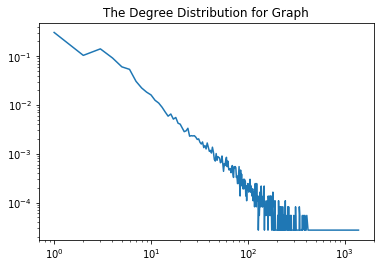

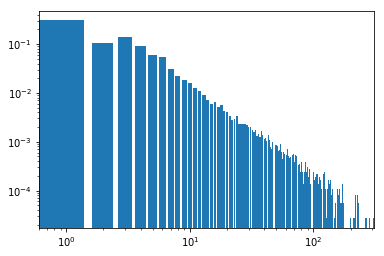

The average degree:  10.0202223918


In [133]:
###社交网络的度分度
NodeNum = G.GetNodes()
EdgeNum = snap.CntUniqDirEdges(G) + snap.CntUniqUndirEdges(G)

degrees = list()
counts = list()
DegToCntV = snap.TIntPrV()  # get distribution of connected components (component size, count)  (1,169)
snap.GetDegCnt(G, DegToCntV)
for item in DegToCntV:
    degrees.append(item.GetVal1())
    counts.append(item.GetVal2())
print len(degrees)
# Normalize the counts: probability of Nk
counts = [value / (1.0 * NodeNum) for value in counts]    

# Plot the degree distributions in log-scale
plt.plot(degrees, counts)
plt.xscale('log')
plt.yscale('log')
plt.title("The Degree Distribution for Graph")
plt.show()

plt.bar(degrees, counts)
plt.xscale('log')
plt.yscale('log')
plt.xlim(-.5,308)
# for x,y in zip(degrees, counts):
#     plt.text(x,y,'%.2f'%y,ha='center',va='bottom')
plt.show()

sum = 0
for p in range(len(counts)):
    sum += degrees[p] * counts[p]
print "The average degree: ", sum


In [134]:
###社交网络的聚集系数
cc_sum = 0
cc_dict = {}  ##degree:clustering coefficient
for node in G.Nodes():
    degree = node.GetDeg()
    neighbors = []
    ee = 0
    if degree >= 2 :
        for n in range(degree):
            new = node.GetNbrNId(n)##Returns ID of NodeN-th neighboring node.
            for x in neighbors:
                ee += G.GetNI(x).IsNbrNId(new) #Returns an iterator referring to the node of ID NId in the graph. 看看这个邻居new跟其他邻居有没有共同的边
            neighbors.append(new)
#         cc = ee * 2.0 / (degree * (degree-1)
            
        cc_sum += ee * 2.0 / (degree * (degree-1))

print "the average clustering coefficient: ", cc_sum/NodeNum
print snap.GetClustCf(G, -1)
# snap.PlotClustCf(G, "example", "Directed graph - clustering coefficient")


# plt.plot(degrees, cc)
# plt.xscale('log')
# plt.yscale('log')
# plt.title("The clustering coefficient for Graph")
# plt.show()        
        
        

the average clustering coefficient:  0.4969825596
0.4969825596


In [135]:
###社交网络的路径长度
path_sum = 0.0
for node in G.Nodes():  ##需要找到node和node——id对应
    node_id = node.GetId()
    NIdToDistH = snap.TIntH()  ##a hash table with integer keys and values (output)
    shortestPath = snap.GetShortPath(G, node_id, NIdToDistH)  #The length of the shortest path from SrcNId to all other nodes.
#     print shortestPath
    path_sum += shortestPath
    
average_path = path_sum / EdgeNum
print "average path length: ", average_path

# snap.PlotHops(G, "example", "Directed graph - hops", True, 1024)

KeyboardInterrupt: 

In [108]:
##GetBetweennessCentr: Computes (approximate) Node and Edge Betweenness Centrality based on a sample of NodeFrac nodes.

Nodes = snap.TIntFltH()
Edges = snap.TIntPrFltH()
snap.GetBetweennessCentr(G, Nodes, Edges, 1.0)
for node in Nodes:
    print "node: %d centrality: %f" % (node, Nodes[node])
for edge in Edges:
    print "edge: (%d, %d) centrality: %f" % (edge.GetVal1(), edge.GetVal2(), Edges[edge])



node: 30 centrality: 5845.222947
node: 1412 centrality: 38728.247401
node: 3352 centrality: 244722.640597
node: 5254 centrality: 213093.417490
node: 5543 centrality: 116727.642534
node: 7478 centrality: 71788.098054
node: 3 centrality: 3732.353897
node: 28 centrality: 186452.836299
node: 39 centrality: 31054.956028
node: 54 centrality: 9736.179684
node: 108 centrality: 498.447484
node: 152 centrality: 34544.093711
node: 178 centrality: 30968.484831
node: 182 centrality: 26554.797777
node: 214 centrality: 189300.921748
node: 271 centrality: 97531.664508
node: 286 centrality: 405.582983
node: 300 centrality: 1221.586399
node: 348 centrality: 6710.023266
node: 349 centrality: 221.779487
node: 371 centrality: 39804.414107
node: 567 centrality: 29340.194271
node: 581 centrality: 132.730254
node: 584 centrality: 334.439293
node: 586 centrality: 443.794411
node: 590 centrality: 1441.561581
node: 604 centrality: 7322.561360
node: 611 centrality: 7444.667119
node: 8283 centrality: 653.082059
no

node: 6009 centrality: 226.575842
node: 6010 centrality: 0.830389
node: 6021 centrality: 85.940712
node: 6032 centrality: 16202.676857
node: 6106 centrality: 0.727817
node: 6149 centrality: 7.257957
node: 6161 centrality: 2465.759641
node: 6218 centrality: 27045.232493
node: 6243 centrality: 19503.245361
node: 6261 centrality: 57.867903
node: 6270 centrality: 17027.227128
node: 6302 centrality: 7325.115289
node: 6334 centrality: 17550.277325
node: 6409 centrality: 2467.737300
node: 6422 centrality: 36779.942428
node: 6474 centrality: 902.058564
node: 6491 centrality: 7091.328111
node: 6554 centrality: 2025.515913
node: 6571 centrality: 397.126954
node: 6594 centrality: 1355.154538
node: 6632 centrality: 1480.600932
node: 6663 centrality: 414.576095
node: 6668 centrality: 33.721671
node: 6685 centrality: 8591.236063
node: 6686 centrality: 3031.670218
node: 6783 centrality: 4160.941983
node: 6873 centrality: 1924.521167
node: 6897 centrality: 5330.294063
node: 6907 centrality: 68521.9617

node: 2019 centrality: 0.000000
node: 2020 centrality: 0.000000
node: 2021 centrality: 0.000000
node: 2044 centrality: 0.000000
node: 2023 centrality: 0.000000
node: 2024 centrality: 0.000000
node: 2025 centrality: 0.000000
node: 2026 centrality: 0.000000
node: 2027 centrality: 0.000000
node: 2045 centrality: 0.000000
node: 2029 centrality: 2.957439
node: 2030 centrality: 0.000000
node: 2031 centrality: 0.000000
node: 2032 centrality: 0.000000
node: 2033 centrality: 856.673180
node: 2034 centrality: 0.000000
node: 2035 centrality: 0.000000
node: 2036 centrality: 0.000000
node: 2037 centrality: 721.927083
node: 6111 centrality: 56.610299
node: 698 centrality: 263.305855
node: 4216 centrality: 227.176840
node: 2038 centrality: 46.487172
node: 2049 centrality: 2.142198
node: 2050 centrality: 5.237832
node: 2051 centrality: 0.000000
node: 2052 centrality: 86.543937
node: 2054 centrality: 6.981584
node: 2056 centrality: 0.000000
node: 2057 centrality: 0.000000
node: 2058 centrality: 0.00000

node: 4755 centrality: 0.000000
node: 4756 centrality: 1118.302173
node: 4757 centrality: 5.758216
node: 4759 centrality: 0.000000
node: 4760 centrality: 52.661160
node: 4761 centrality: 0.000000
node: 4762 centrality: 0.000000
node: 4763 centrality: 0.000000
node: 4765 centrality: 7.448796
node: 4771 centrality: 11.393877
node: 4766 centrality: 0.000000
node: 4773 centrality: 0.000000
node: 4774 centrality: 55.719323
node: 4782 centrality: 0.110084
node: 4785 centrality: 0.000000
node: 4787 centrality: 0.000000
node: 4788 centrality: 428.853827
node: 4789 centrality: 3.250140
node: 4790 centrality: 0.000000
node: 7909 centrality: 0.925927
node: 4793 centrality: 2.315880
node: 4794 centrality: 0.000000
node: 4799 centrality: 0.000000
node: 4800 centrality: 0.000000
node: 4803 centrality: 0.000000
node: 4804 centrality: 0.000000
node: 4805 centrality: 0.281544
node: 4806 centrality: 0.000000
node: 4807 centrality: 0.000000
node: 4810 centrality: 0.000000
node: 4813 centrality: 817.62113

node: 7298 centrality: 1.927717
node: 7299 centrality: 0.000000
node: 7300 centrality: 0.000000
node: 7302 centrality: 0.000000
node: 7305 centrality: 0.000000
node: 7171 centrality: 119.540425
node: 7309 centrality: 0.000000
node: 7310 centrality: 0.000000
node: 7317 centrality: 306.400159
node: 7320 centrality: 0.000000
node: 7294 centrality: 579.158874
node: 7326 centrality: 0.000000
node: 7327 centrality: 3.772205
node: 7281 centrality: 48.499789
node: 7329 centrality: 0.713922
node: 7333 centrality: 0.000000
node: 7330 centrality: 0.524571
node: 7332 centrality: 0.000000
node: 7335 centrality: 268.706453
node: 7336 centrality: 0.000000
node: 7337 centrality: 0.000000
node: 7342 centrality: 0.000000
node: 7345 centrality: 0.000000
node: 7343 centrality: 69.634821
node: 7344 centrality: 3.655216
node: 7347 centrality: 0.000000
node: 7348 centrality: 1.043170
node: 7349 centrality: 0.000000
node: 7350 centrality: 128.803936
node: 7352 centrality: 123.794750
node: 7353 centrality: 0.0

edge: (178, 396) centrality: 494.424681
edge: (178, 405) centrality: 342.790872
edge: (178, 429) centrality: 375.619348
edge: (178, 560) centrality: 885.496925
edge: (178, 564) centrality: 388.163923
edge: (178, 590) centrality: 332.831079
edge: (178, 600) centrality: 1865.519461
edge: (178, 606) centrality: 1283.042948
edge: (178, 616) centrality: 988.132606
edge: (178, 673) centrality: 544.973280
edge: (178, 704) centrality: 523.489621
edge: (178, 719) centrality: 265.278881
edge: (178, 723) centrality: 309.553824
edge: (178, 730) centrality: 283.043822
edge: (178, 741) centrality: 287.342646
edge: (178, 798) centrality: 408.831969
edge: (178, 817) centrality: 482.258302
edge: (178, 829) centrality: 988.565889
edge: (178, 838) centrality: 851.646051
edge: (178, 844) centrality: 455.587454
edge: (178, 866) centrality: 404.901383
edge: (178, 895) centrality: 183.183514
edge: (178, 906) centrality: 653.000977
edge: (178, 958) centrality: 354.269783
edge: (178, 983) centrality: 1242.0273

edge: (8, 499) centrality: 1049.482732
edge: (8, 513) centrality: 6550.372080
edge: (8, 738) centrality: 1664.761466
edge: (8, 782) centrality: 1640.554684
edge: (8, 808) centrality: 2697.592070
edge: (19, 23) centrality: 89.639466
edge: (19, 28) centrality: 379.927919
edge: (19, 30) centrality: 201.201776
edge: (19, 33) centrality: 143.455039
edge: (19, 38) centrality: 83.044171
edge: (19, 50) centrality: 59.179191
edge: (19, 54) centrality: 89.762773
edge: (19, 55) centrality: 275.958322
edge: (19, 61) centrality: 84.797615
edge: (19, 89) centrality: 233.398186
edge: (19, 127) centrality: 1245.972847
edge: (19, 130) centrality: 64.141133
edge: (19, 132) centrality: 139.898915
edge: (19, 151) centrality: 252.549590
edge: (19, 154) centrality: 228.056539
edge: (19, 163) centrality: 431.223609
edge: (19, 168) centrality: 98.353389
edge: (19, 182) centrality: 455.955861
edge: (19, 183) centrality: 75.807857
edge: (19, 214) centrality: 867.672440
edge: (19, 216) centrality: 91.469671
edge

edge: (308, 2323) centrality: 1092.506513
edge: (308, 2328) centrality: 2763.743853
edge: (308, 2329) centrality: 281.757956
edge: (308, 2339) centrality: 1500.680700
edge: (308, 2345) centrality: 675.748450
edge: (308, 2409) centrality: 533.683792
edge: (308, 2474) centrality: 931.508881
edge: (308, 2535) centrality: 2268.469113
edge: (308, 2774) centrality: 1503.798605
edge: (308, 2805) centrality: 983.347200
edge: (308, 2828) centrality: 453.312403
edge: (308, 3005) centrality: 719.012896
edge: (308, 3136) centrality: 730.676556
edge: (308, 3150) centrality: 886.347731
edge: (308, 3443) centrality: 1321.952484
edge: (308, 3473) centrality: 764.381607
edge: (308, 3562) centrality: 1866.045275
edge: (308, 3976) centrality: 3562.571057
edge: (308, 4233) centrality: 969.834544
edge: (308, 4373) centrality: 2182.345302
edge: (308, 4687) centrality: 2746.085497
edge: (308, 5288) centrality: 3177.482151
edge: (308, 5584) centrality: 879.739131
edge: (308, 5714) centrality: 2072.548336
edge

edge: (56, 2211) centrality: 528.083958
edge: (56, 2323) centrality: 2359.773614
edge: (56, 2651) centrality: 5006.890436
edge: (56, 8287) centrality: 4079.144388
edge: (56, 8290) centrality: 806.569338
edge: (56, 59) centrality: 577.383079
edge: (56, 66) centrality: 585.182932
edge: (56, 67) centrality: 2537.657158
edge: (56, 68) centrality: 4441.411121
edge: (56, 72) centrality: 2596.226751
edge: (56, 74) centrality: 463.260794
edge: (56, 75) centrality: 1851.478629
edge: (56, 78) centrality: 2453.580454
edge: (56, 86) centrality: 1595.411173
edge: (56, 87) centrality: 1768.860443
edge: (56, 89) centrality: 766.731823
edge: (56, 94) centrality: 836.198716
edge: (56, 98) centrality: 3868.403594
edge: (56, 101) centrality: 4383.294739
edge: (56, 113) centrality: 780.306855
edge: (56, 130) centrality: 698.100712
edge: (56, 132) centrality: 646.013326
edge: (56, 136) centrality: 2169.508033
edge: (56, 140) centrality: 3737.867578
edge: (56, 150) centrality: 785.391158
edge: (56, 157) cen

edge: (643, 972) centrality: 347.206845
edge: (643, 1023) centrality: 254.301281
edge: (643, 1026) centrality: 984.225941
edge: (643, 1053) centrality: 246.771581
edge: (643, 1123) centrality: 410.510528
edge: (643, 1151) centrality: 2128.873442
edge: (643, 1259) centrality: 536.242299
edge: (643, 1279) centrality: 477.965686
edge: (643, 1413) centrality: 168.867972
edge: (643, 1534) centrality: 479.446881
edge: (643, 1718) centrality: 349.184668
edge: (643, 1758) centrality: 445.702862
edge: (643, 1919) centrality: 952.869981
edge: (643, 1964) centrality: 558.620728
edge: (643, 2253) centrality: 279.417984
edge: (643, 2654) centrality: 2522.356485
edge: (643, 3338) centrality: 418.903190
edge: (643, 3803) centrality: 875.131894
edge: (643, 3871) centrality: 737.008953
edge: (643, 4037) centrality: 5495.878019
edge: (643, 4117) centrality: 696.200476
edge: (643, 4179) centrality: 1011.129927
edge: (643, 4735) centrality: 1413.029076
edge: (643, 6305) centrality: 3041.459683
edge: (643,

edge: (871, 1522) centrality: 544.096832
edge: (885, 937) centrality: 400.275075
edge: (885, 977) centrality: 220.779732
edge: (885, 995) centrality: 85.277878
edge: (885, 1144) centrality: 139.804276
edge: (885, 1556) centrality: 159.786243
edge: (885, 1563) centrality: 339.510082
edge: (895, 1569) centrality: 208.599215
edge: (895, 2763) centrality: 325.734661
edge: (897, 898) centrality: 253.127688
edge: (904, 928) centrality: 722.803818
edge: (904, 959) centrality: 199.190447
edge: (904, 971) centrality: 220.905497
edge: (904, 982) centrality: 440.908968
edge: (904, 993) centrality: 499.537592
edge: (904, 999) centrality: 297.347847
edge: (904, 1014) centrality: 354.498067
edge: (904, 1031) centrality: 491.592180
edge: (904, 1097) centrality: 374.519663
edge: (904, 1103) centrality: 338.427918
edge: (904, 1127) centrality: 216.842774
edge: (904, 1151) centrality: 1838.123318
edge: (904, 1154) centrality: 384.861848
edge: (904, 1160) centrality: 391.863502
edge: (904, 1165) centrali

edge: (1167, 2834) centrality: 452.528266
edge: (1167, 2838) centrality: 396.464715
edge: (1167, 2877) centrality: 1384.139326
edge: (1167, 2880) centrality: 2351.084564
edge: (1167, 2900) centrality: 579.718972
edge: (1167, 2966) centrality: 822.581326
edge: (1167, 3028) centrality: 3044.030706
edge: (1167, 3033) centrality: 468.967694
edge: (1167, 3130) centrality: 1091.467981
edge: (1167, 3164) centrality: 1813.210411
edge: (1167, 3200) centrality: 1430.366203
edge: (1167, 3253) centrality: 306.036978
edge: (1167, 3334) centrality: 3956.643993
edge: (1167, 3352) centrality: 2661.157269
edge: (1167, 3408) centrality: 1084.988383
edge: (1167, 3446) centrality: 1055.661045
edge: (1167, 3541) centrality: 1585.788399
edge: (1167, 3650) centrality: 1625.314967
edge: (1167, 3720) centrality: 1302.322820
edge: (1167, 3755) centrality: 1548.208378
edge: (1167, 3835) centrality: 1497.757808
edge: (1167, 3976) centrality: 3366.972659
edge: (1167, 4110) centrality: 2742.410349
edge: (1167, 4365

edge: (1549, 3334) centrality: 6962.202721
edge: (1549, 3338) centrality: 1054.562279
edge: (1549, 3351) centrality: 1136.116177
edge: (1549, 3352) centrality: 3828.226194
edge: (1549, 3393) centrality: 1979.034505
edge: (1549, 3394) centrality: 1758.109791
edge: (1549, 3404) centrality: 1979.868735
edge: (1549, 3408) centrality: 2855.240559
edge: (1549, 3439) centrality: 1548.966692
edge: (1549, 3443) centrality: 3145.072978
edge: (1549, 3453) centrality: 5783.923167
edge: (1549, 3454) centrality: 2354.416131
edge: (1549, 3456) centrality: 3046.738955
edge: (1549, 3459) centrality: 5747.133419
edge: (1549, 3463) centrality: 2220.479838
edge: (1549, 3473) centrality: 1833.395644
edge: (1549, 3480) centrality: 4279.308559
edge: (1549, 3489) centrality: 2195.012907
edge: (1549, 3498) centrality: 2971.186227
edge: (1549, 3529) centrality: 1862.297238
edge: (1549, 3537) centrality: 3674.277677
edge: (1549, 3541) centrality: 3184.425341
edge: (1549, 3562) centrality: 3789.031033
edge: (1549

edge: (1919, 3018) centrality: 1559.679606
edge: (1919, 3025) centrality: 3266.764070
edge: (1919, 3026) centrality: 1045.857624
edge: (1919, 3047) centrality: 2136.288800
edge: (1919, 3056) centrality: 1301.357227
edge: (1919, 3059) centrality: 1176.042161
edge: (1919, 3060) centrality: 5214.762297
edge: (1919, 3062) centrality: 686.775532
edge: (1919, 3072) centrality: 947.072218
edge: (1919, 3077) centrality: 4186.349211
edge: (1919, 3081) centrality: 859.743635
edge: (1919, 3101) centrality: 9755.389558
edge: (1919, 3118) centrality: 9347.490790
edge: (1919, 3148) centrality: 968.923957
edge: (1919, 3242) centrality: 2983.742881
edge: (1919, 3260) centrality: 808.771473
edge: (1919, 3366) centrality: 1131.597379
edge: (1919, 3388) centrality: 929.434193
edge: (1919, 7218) centrality: 14130.000000
edge: (1919, 7219) centrality: 14130.000000
edge: (36, 38) centrality: 1683.061817
edge: (36, 50) centrality: 1620.473967
edge: (36, 54) centrality: 2702.484221
edge: (36, 55) centrality: 

edge: (11, 1901) centrality: 4079.050545
edge: (11, 1903) centrality: 3018.811816
edge: (11, 1908) centrality: 10836.430590
edge: (11, 1919) centrality: 3598.027613
edge: (11, 1920) centrality: 3111.161963
edge: (11, 1927) centrality: 1909.390483
edge: (11, 1953) centrality: 1805.371509
edge: (11, 1956) centrality: 3902.162711
edge: (11, 1963) centrality: 5661.242104
edge: (11, 1964) centrality: 3736.052327
edge: (11, 1965) centrality: 1543.123260
edge: (11, 1966) centrality: 1438.815518
edge: (11, 1969) centrality: 1658.197949
edge: (11, 1973) centrality: 1455.914352
edge: (11, 1977) centrality: 5399.373168
edge: (11, 1979) centrality: 1430.143018
edge: (11, 1983) centrality: 2533.780684
edge: (11, 1985) centrality: 4044.038652
edge: (11, 1987) centrality: 1312.919420
edge: (11, 1990) centrality: 3925.823695
edge: (11, 1991) centrality: 2494.021941
edge: (11, 1992) centrality: 2338.334497
edge: (11, 1997) centrality: 1879.878062
edge: (11, 2004) centrality: 2635.938610
edge: (11, 2007

edge: (465, 3010) centrality: 404.937361
edge: (465, 3028) centrality: 1125.901377
edge: (465, 3055) centrality: 235.448541
edge: (465, 3084) centrality: 1052.585215
edge: (465, 3127) centrality: 1227.068532
edge: (465, 3172) centrality: 848.979595
edge: (465, 3291) centrality: 797.005051
edge: (465, 3352) centrality: 1450.397478
edge: (465, 3394) centrality: 597.041282
edge: (465, 3404) centrality: 684.751064
edge: (465, 3488) centrality: 575.549708
edge: (465, 3527) centrality: 288.849523
edge: (465, 3555) centrality: 306.597756
edge: (465, 3614) centrality: 1076.229638
edge: (465, 3615) centrality: 515.056378
edge: (465, 3622) centrality: 398.372021
edge: (465, 3630) centrality: 315.382313
edge: (465, 3641) centrality: 994.073806
edge: (465, 3642) centrality: 3040.733490
edge: (465, 3647) centrality: 764.000033
edge: (465, 3659) centrality: 314.636846
edge: (465, 3709) centrality: 1155.945988
edge: (465, 3724) centrality: 384.740680
edge: (465, 3798) centrality: 389.776876
edge: (46

edge: (937, 1156) centrality: 595.381187
edge: (937, 1191) centrality: 526.059129
edge: (937, 1222) centrality: 179.057002
edge: (937, 1240) centrality: 1119.754229
edge: (937, 1260) centrality: 436.230920
edge: (937, 1277) centrality: 2700.943493
edge: (937, 1284) centrality: 297.186231
edge: (937, 1378) centrality: 131.316082
edge: (937, 1413) centrality: 137.592696
edge: (937, 1453) centrality: 461.500272
edge: (937, 1549) centrality: 2442.477032
edge: (937, 1585) centrality: 257.232957
edge: (937, 1621) centrality: 410.765756
edge: (937, 1723) centrality: 875.769673
edge: (937, 1754) centrality: 286.143227
edge: (937, 1781) centrality: 689.169710
edge: (937, 1888) centrality: 393.127110
edge: (937, 1919) centrality: 625.330394
edge: (937, 1956) centrality: 527.318870
edge: (937, 2071) centrality: 202.418870
edge: (937, 2114) centrality: 623.686462
edge: (937, 2251) centrality: 734.598175
edge: (937, 2485) centrality: 2160.877515
edge: (937, 2625) centrality: 1409.746746
edge: (937,

edge: (1151, 6043) centrality: 1467.547050
edge: (1151, 6094) centrality: 4094.574719
edge: (1151, 6124) centrality: 1525.694716
edge: (1151, 6151) centrality: 2146.633354
edge: (1151, 6156) centrality: 7057.412322
edge: (1151, 6166) centrality: 1866.758205
edge: (1151, 6174) centrality: 2385.789728
edge: (1151, 6226) centrality: 3840.241972
edge: (1151, 6229) centrality: 2412.558731
edge: (1151, 6327) centrality: 8041.834422
edge: (1151, 6328) centrality: 3341.648068
edge: (1151, 6337) centrality: 1651.506143
edge: (1151, 6414) centrality: 2541.587509
edge: (1151, 6437) centrality: 1299.856108
edge: (1151, 6458) centrality: 8536.670531
edge: (1151, 6481) centrality: 2808.647323
edge: (1151, 6496) centrality: 4275.585504
edge: (1151, 6523) centrality: 4634.682206
edge: (1151, 6528) centrality: 4241.940141
edge: (1151, 6552) centrality: 1681.180568
edge: (1151, 6555) centrality: 7384.488247
edge: (1151, 6560) centrality: 5645.760422
edge: (1151, 6589) centrality: 1296.952759
edge: (1151

edge: (1374, 2193) centrality: 4669.075608
edge: (1374, 2202) centrality: 7356.034854
edge: (1374, 2223) centrality: 3283.938918
edge: (1374, 2225) centrality: 771.489924
edge: (1374, 2246) centrality: 3415.061187
edge: (1374, 2253) centrality: 2154.874012
edge: (1374, 2257) centrality: 900.303591
edge: (1374, 2258) centrality: 781.892866
edge: (1374, 2264) centrality: 1913.747214
edge: (1374, 2273) centrality: 3373.553135
edge: (1374, 2307) centrality: 3506.659461
edge: (1374, 2322) centrality: 1307.700281
edge: (1374, 2323) centrality: 2521.074580
edge: (1374, 2325) centrality: 2482.092861
edge: (1374, 2338) centrality: 2047.836813
edge: (1374, 2354) centrality: 2993.202319
edge: (1374, 2369) centrality: 2841.863584
edge: (1374, 2375) centrality: 1471.012684
edge: (1374, 2397) centrality: 7548.163317
edge: (1374, 2398) centrality: 4177.998769
edge: (1374, 2410) centrality: 877.020691
edge: (1374, 2470) centrality: 31294.181507
edge: (1374, 2485) centrality: 1946.174210
edge: (1374, 2

edge: (1608, 2604) centrality: 1461.525262
edge: (1608, 2617) centrality: 695.514442
edge: (1608, 2625) centrality: 3093.136276
edge: (1608, 2643) centrality: 4211.378174
edge: (1608, 2653) centrality: 1329.154475
edge: (1608, 2654) centrality: 4095.616715
edge: (1608, 2662) centrality: 1952.610333
edge: (1608, 2669) centrality: 1000.338042
edge: (1608, 2685) centrality: 1297.393509
edge: (1608, 2697) centrality: 933.402768
edge: (1608, 2707) centrality: 1483.715117
edge: (1608, 2721) centrality: 918.750941
edge: (1608, 2747) centrality: 2089.557334
edge: (1608, 2754) centrality: 659.284293
edge: (1608, 2763) centrality: 1190.476345
edge: (1608, 2794) centrality: 616.862254
edge: (1608, 2805) centrality: 1092.216407
edge: (1608, 2814) centrality: 1364.342335
edge: (1608, 2815) centrality: 1053.763866
edge: (1608, 2828) centrality: 500.259653
edge: (1608, 2830) centrality: 802.835470
edge: (1608, 2834) centrality: 666.338234
edge: (1608, 2856) centrality: 1292.747601
edge: (1608, 2871) 

edge: (1848, 2236) centrality: 155.636997
edge: (1848, 2242) centrality: 556.306730
edge: (1849, 1852) centrality: 14130.000000
edge: (1849, 1853) centrality: 14130.000000
edge: (1857, 1859) centrality: 311.289228
edge: (1857, 2307) centrality: 412.362126
edge: (1857, 2785) centrality: 1197.332696
edge: (1857, 2787) centrality: 491.575990
edge: (1857, 8290) centrality: 316.066372
edge: (1857, 8291) centrality: 335.973907
edge: (1857, 1941) centrality: 14130.000000
edge: (1858, 1859) centrality: 184.964623
edge: (1858, 1908) centrality: 270.434229
edge: (1858, 1962) centrality: 145.478210
edge: (1858, 1967) centrality: 211.393222
edge: (1859, 3443) centrality: 1199.391996
edge: (1859, 4037) centrality: 5373.814716
edge: (1859, 4071) centrality: 1089.094933
edge: (1859, 1860) centrality: 14130.000000
edge: (1888, 1893) centrality: 357.376303
edge: (1888, 1956) centrality: 615.410438
edge: (1888, 1977) centrality: 351.135287
edge: (1888, 2102) centrality: 290.459036
edge: (1888, 2128) cen

edge: (2252, 3352) centrality: 1231.698310
edge: (2252, 3379) centrality: 421.158929
edge: (2252, 3394) centrality: 420.449787
edge: (2252, 3402) centrality: 351.155644
edge: (2252, 3444) centrality: 3616.366527
edge: (2252, 3470) centrality: 418.044272
edge: (2252, 3477) centrality: 172.263628
edge: (2252, 3482) centrality: 327.459608
edge: (2252, 3553) centrality: 1337.647851
edge: (2252, 3577) centrality: 14130.000000
edge: (2252, 3615) centrality: 414.220299
edge: (2252, 3633) centrality: 193.196550
edge: (2252, 3660) centrality: 276.634950
edge: (2252, 3666) centrality: 467.474373
edge: (2252, 3786) centrality: 725.836206
edge: (2252, 3787) centrality: 1078.167586
edge: (2252, 3814) centrality: 332.742885
edge: (2252, 3961) centrality: 496.913266
edge: (2257, 2381) centrality: 215.813639
edge: (2257, 2397) centrality: 1196.803219
edge: (2257, 2440) centrality: 306.145570
edge: (2257, 2544) centrality: 374.479871
edge: (2257, 2576) centrality: 488.821478
edge: (2257, 2593) centrali

edge: (2508, 2625) centrality: 2190.349472
edge: (2508, 2669) centrality: 393.331004
edge: (2508, 3562) centrality: 895.790468
edge: (2508, 3892) centrality: 583.098339
edge: (2508, 5083) centrality: 862.269413
edge: (2508, 6004) centrality: 1593.735882
edge: (2508, 2524) centrality: 2203.558561
edge: (2508, 2545) centrality: 1906.993500
edge: (2508, 2559) centrality: 241.986693
edge: (2508, 2560) centrality: 985.803100
edge: (2508, 2564) centrality: 412.791925
edge: (2508, 2565) centrality: 7145.175256
edge: (2508, 2654) centrality: 1714.778573
edge: (2508, 2688) centrality: 3059.342091
edge: (2508, 2691) centrality: 305.904901
edge: (2508, 2713) centrality: 578.899528
edge: (2508, 2842) centrality: 454.221263
edge: (2508, 2851) centrality: 1709.954389
edge: (2508, 2859) centrality: 913.692582
edge: (2508, 2872) centrality: 257.495896
edge: (2508, 3009) centrality: 382.956690
edge: (2508, 3026) centrality: 822.685004
edge: (2508, 3032) centrality: 1076.342894
edge: (2508, 3088) centra

edge: (2653, 3417) centrality: 526.184769
edge: (2653, 3451) centrality: 473.170424
edge: (2653, 3477) centrality: 345.780118
edge: (2653, 3479) centrality: 510.446685
edge: (2653, 3481) centrality: 1194.987026
edge: (2653, 3512) centrality: 1664.528544
edge: (2653, 3535) centrality: 5997.106207
edge: (2653, 3541) centrality: 425.389874
edge: (2653, 3553) centrality: 2990.155803
edge: (2653, 3560) centrality: 1064.433375
edge: (2653, 3569) centrality: 301.780821
edge: (2653, 3571) centrality: 566.299803
edge: (2653, 3624) centrality: 320.839765
edge: (2653, 3631) centrality: 801.537203
edge: (2653, 3641) centrality: 634.991948
edge: (2653, 3660) centrality: 244.650373
edge: (2653, 3682) centrality: 288.258136
edge: (2653, 3714) centrality: 1448.903230
edge: (2653, 3724) centrality: 328.051007
edge: (2653, 3787) centrality: 796.643456
edge: (2653, 3814) centrality: 666.167519
edge: (2653, 3925) centrality: 2854.299959
edge: (2653, 3949) centrality: 644.780944
edge: (2653, 3965) centrali

edge: (3010, 3887) centrality: 318.394454
edge: (3010, 3892) centrality: 412.277121
edge: (3010, 3903) centrality: 252.714738
edge: (3010, 3937) centrality: 465.096566
edge: (3010, 4400) centrality: 566.875173
edge: (3010, 4712) centrality: 1191.647356
edge: (3010, 4764) centrality: 677.032126
edge: (3010, 5022) centrality: 2159.567047
edge: (3010, 5072) centrality: 846.022402
edge: (3010, 5130) centrality: 930.840546
edge: (3010, 5222) centrality: 1175.673091
edge: (3010, 5412) centrality: 754.847562
edge: (3010, 5445) centrality: 1042.555789
edge: (3010, 5449) centrality: 428.303788
edge: (3010, 5596) centrality: 1706.759689
edge: (3010, 5780) centrality: 367.520216
edge: (3010, 5829) centrality: 1116.222066
edge: (3010, 5871) centrality: 945.461942
edge: (3010, 6347) centrality: 930.583432
edge: (3010, 6441) centrality: 696.632291
edge: (3010, 6770) centrality: 1434.037697
edge: (3010, 6783) centrality: 524.247598
edge: (3010, 8293) centrality: 1481.014433
edge: (3010, 8294) central

edge: (3394, 3772) centrality: 513.218053
edge: (3394, 3776) centrality: 1511.704192
edge: (3394, 3785) centrality: 332.686656
edge: (3394, 3800) centrality: 281.101768
edge: (3394, 3811) centrality: 2952.440155
edge: (3394, 3812) centrality: 285.249256
edge: (3394, 3813) centrality: 345.082423
edge: (3394, 3822) centrality: 1378.527378
edge: (3394, 3867) centrality: 1071.014800
edge: (3394, 3898) centrality: 557.781777
edge: (3394, 3903) centrality: 334.390077
edge: (3394, 3914) centrality: 1231.230375
edge: (3394, 3922) centrality: 500.504722
edge: (3394, 3926) centrality: 225.126542
edge: (3394, 3942) centrality: 3619.797872
edge: (3394, 3958) centrality: 530.636200
edge: (3394, 3974) centrality: 4779.747413
edge: (3394, 4011) centrality: 329.654159
edge: (3394, 4021) centrality: 336.444762
edge: (3394, 4031) centrality: 717.232553
edge: (3394, 4124) centrality: 376.922433
edge: (3394, 4189) centrality: 452.489052
edge: (3394, 4191) centrality: 1230.515218
edge: (3394, 4256) central

edge: (3615, 3847) centrality: 374.362746
edge: (3615, 3887) centrality: 441.730193
edge: (3615, 3893) centrality: 801.568825
edge: (3615, 3903) centrality: 307.591877
edge: (3615, 3910) centrality: 841.647999
edge: (3615, 3926) centrality: 190.429445
edge: (3615, 3933) centrality: 1112.140231
edge: (3615, 3937) centrality: 539.836252
edge: (3615, 3946) centrality: 356.909002
edge: (3615, 3956) centrality: 271.915808
edge: (3615, 3967) centrality: 471.080699
edge: (3615, 3969) centrality: 551.378214
edge: (3615, 3970) centrality: 495.275083
edge: (3615, 3980) centrality: 914.926776
edge: (3615, 3999) centrality: 2136.547150
edge: (3615, 4013) centrality: 183.444871
edge: (3615, 4024) centrality: 378.218576
edge: (3615, 4043) centrality: 331.374774
edge: (3615, 4044) centrality: 512.217391
edge: (3615, 4055) centrality: 505.564228
edge: (3615, 4098) centrality: 692.024975
edge: (3615, 4111) centrality: 586.481409
edge: (3615, 4124) centrality: 309.424288
edge: (3615, 4179) centrality: 6

edge: (4661, 4662) centrality: 118.723889
edge: (4661, 4719) centrality: 178.522845
edge: (4661, 5459) centrality: 519.208230
edge: (4661, 5563) centrality: 439.611830
edge: (4661, 5596) centrality: 902.055571
edge: (4661, 5804) centrality: 632.291641
edge: (4661, 5822) centrality: 694.493856
edge: (4661, 6555) centrality: 1293.454551
edge: (4661, 7855) centrality: 703.869406
edge: (4661, 7882) centrality: 671.063021
edge: (4661, 4663) centrality: 753.167007
edge: (4661, 4682) centrality: 954.961266
edge: (4661, 4686) centrality: 223.664087
edge: (4661, 4687) centrality: 813.738619
edge: (4661, 4688) centrality: 163.502012
edge: (4661, 4689) centrality: 723.737314
edge: (4662, 4666) centrality: 385.614083
edge: (4662, 4780) centrality: 196.720668
edge: (4662, 4797) centrality: 152.943567
edge: (4662, 4820) centrality: 249.580742
edge: (4662, 4953) centrality: 163.870736
edge: (4662, 4962) centrality: 197.368089
edge: (4662, 5083) centrality: 311.289934
edge: (4662, 5123) centrality: 34

edge: (737, 4964) centrality: 1165.093739
edge: (737, 4967) centrality: 1821.234293
edge: (737, 4974) centrality: 1109.298123
edge: (737, 4988) centrality: 1786.644947
edge: (737, 5008) centrality: 1758.047530
edge: (737, 5029) centrality: 1865.743317
edge: (737, 5069) centrality: 6845.503445
edge: (737, 5079) centrality: 2714.199430
edge: (737, 5099) centrality: 2642.088982
edge: (737, 5102) centrality: 1193.727738
edge: (737, 5119) centrality: 2996.206365
edge: (737, 5171) centrality: 1144.092149
edge: (737, 5175) centrality: 1367.211441
edge: (737, 5176) centrality: 1030.111526
edge: (737, 5184) centrality: 1184.609960
edge: (737, 5189) centrality: 1937.426253
edge: (737, 5190) centrality: 1552.799460
edge: (737, 5203) centrality: 3604.441113
edge: (737, 5250) centrality: 3188.822112
edge: (737, 5285) centrality: 955.330368
edge: (737, 5312) centrality: 1797.548264
edge: (737, 5352) centrality: 9069.250484
edge: (737, 5382) centrality: 2234.366347
edge: (737, 5462) centrality: 3031.

edge: (2693, 5891) centrality: 1996.716478
edge: (2693, 5936) centrality: 863.080173
edge: (2693, 6004) centrality: 1453.173601
edge: (2693, 6330) centrality: 1413.751699
edge: (2693, 6347) centrality: 1339.913156
edge: (2693, 6496) centrality: 1989.809075
edge: (2693, 6566) centrality: 890.779301
edge: (2693, 6595) centrality: 811.227193
edge: (2693, 6613) centrality: 1172.330047
edge: (2693, 6790) centrality: 1323.199474
edge: (2693, 6855) centrality: 986.944085
edge: (2693, 6869) centrality: 878.717573
edge: (2693, 6901) centrality: 602.268516
edge: (2693, 6955) centrality: 783.735790
edge: (2693, 8293) centrality: 2752.941225
edge: (2693, 8295) centrality: 1082.016538
edge: (2693, 2700) centrality: 259.910371
edge: (2693, 2704) centrality: 620.007249
edge: (2693, 2713) centrality: 308.919852
edge: (2693, 2740) centrality: 1551.321344
edge: (2693, 2790) centrality: 553.720731
edge: (2693, 2815) centrality: 720.410140
edge: (2693, 2842) centrality: 512.347750
edge: (2693, 2940) centr

edge: (742, 7662) centrality: 1588.418544
edge: (742, 7691) centrality: 1592.744979
edge: (742, 7707) centrality: 2264.093383
edge: (742, 7795) centrality: 1017.353844
edge: (742, 7803) centrality: 4407.294209
edge: (742, 7809) centrality: 1200.835187
edge: (742, 788) centrality: 614.834725
edge: (742, 796) centrality: 4082.920353
edge: (742, 816) centrality: 615.662926
edge: (742, 954) centrality: 1063.528742
edge: (742, 956) centrality: 426.884602
edge: (742, 967) centrality: 1421.015802
edge: (742, 1029) centrality: 1040.011562
edge: (742, 1035) centrality: 531.967896
edge: (769, 802) centrality: 2527.418411
edge: (769, 805) centrality: 546.929093
edge: (769, 813) centrality: 1184.350151
edge: (769, 817) centrality: 939.731199
edge: (769, 829) centrality: 1963.617670
edge: (769, 868) centrality: 1803.098622
edge: (769, 887) centrality: 549.103007
edge: (769, 893) centrality: 989.844449
edge: (769, 904) centrality: 658.125122
edge: (769, 922) centrality: 1513.837468
edge: (769, 941) 

edge: (1814, 2507) centrality: 162.499288
edge: (1814, 2510) centrality: 206.440191
edge: (1814, 2559) centrality: 244.532020
edge: (1814, 2565) centrality: 1371.035291
edge: (1814, 2618) centrality: 316.483625
edge: (1814, 2674) centrality: 212.742209
edge: (1814, 2686) centrality: 258.401317
edge: (1814, 2688) centrality: 726.956472
edge: (1814, 2690) centrality: 849.345845
edge: (1814, 2703) centrality: 310.693654
edge: (1814, 2704) centrality: 353.787555
edge: (1814, 2706) centrality: 782.216910
edge: (1814, 2790) centrality: 479.427642
edge: (1814, 2871) centrality: 635.214074
edge: (1814, 3006) centrality: 751.177891
edge: (1814, 3020) centrality: 410.594498
edge: (1814, 3026) centrality: 348.483444
edge: (1814, 3028) centrality: 776.018648
edge: (1814, 3062) centrality: 469.793699
edge: (1814, 3092) centrality: 439.100678
edge: (1814, 3095) centrality: 450.631936
edge: (1814, 3098) centrality: 648.654086
edge: (1814, 3125) centrality: 483.520294
edge: (1814, 3225) centrality: 11

edge: (2822, 3847) centrality: 395.391338
edge: (2822, 4021) centrality: 467.178386
edge: (2822, 4124) centrality: 477.192423
edge: (2822, 5412) centrality: 668.230747
edge: (2822, 5928) centrality: 543.947591
edge: (2822, 5963) centrality: 1764.235521
edge: (2822, 8292) centrality: 613.624895
edge: (2822, 2883) centrality: 539.935752
edge: (2822, 2972) centrality: 1060.383713
edge: (2822, 2999) centrality: 559.473041
edge: (2822, 3057) centrality: 387.131464
edge: (2822, 3103) centrality: 258.775753
edge: (2822, 3191) centrality: 409.420183
edge: (2822, 3352) centrality: 1298.013870
edge: (2822, 3390) centrality: 399.291965
edge: (2822, 3392) centrality: 524.936248
edge: (2822, 3402) centrality: 321.608819
edge: (2822, 3417) centrality: 292.763361
edge: (2822, 3447) centrality: 1006.204652
edge: (2822, 3449) centrality: 562.937998
edge: (2822, 3453) centrality: 1064.383893
edge: (2822, 3456) centrality: 941.452755
edge: (2822, 3457) centrality: 453.155169
edge: (2822, 3462) centrality

edge: (1166, 1385) centrality: 4088.885973
edge: (1166, 1393) centrality: 1247.085577
edge: (1166, 1411) centrality: 9552.776696
edge: (1166, 1416) centrality: 1616.972300
edge: (1166, 1419) centrality: 1246.998682
edge: (1166, 1437) centrality: 3595.816393
edge: (1166, 1453) centrality: 3524.404724
edge: (1166, 1473) centrality: 2084.879305
edge: (1166, 1482) centrality: 2713.739628
edge: (1166, 1492) centrality: 1821.122537
edge: (1166, 1521) centrality: 1492.500836
edge: (1166, 1547) centrality: 1547.277537
edge: (1166, 1548) centrality: 4345.848704
edge: (1166, 1549) centrality: 1858.767901
edge: (1166, 1566) centrality: 1633.926862
edge: (1166, 1571) centrality: 866.449706
edge: (1166, 1585) centrality: 1867.031214
edge: (1166, 1592) centrality: 3941.894835
edge: (1166, 1622) centrality: 2719.021396
edge: (1166, 1633) centrality: 2702.336957
edge: (1166, 1637) centrality: 3432.190261
edge: (1166, 1653) centrality: 1423.919967
edge: (1166, 1678) centrality: 3296.402343
edge: (1166,

edge: (4099, 5680) centrality: 2103.986139
edge: (4099, 5684) centrality: 355.169593
edge: (4099, 5697) centrality: 1222.260292
edge: (4099, 5714) centrality: 1184.092625
edge: (4099, 5743) centrality: 292.573027
edge: (4099, 5760) centrality: 1121.601317
edge: (4099, 5800) centrality: 1901.909335
edge: (4099, 5818) centrality: 1189.210180
edge: (4099, 5827) centrality: 387.320441
edge: (4099, 5828) centrality: 391.120484
edge: (4099, 5871) centrality: 682.671545
edge: (4099, 5886) centrality: 915.642264
edge: (4099, 5897) centrality: 520.728144
edge: (4099, 5902) centrality: 1112.442407
edge: (4099, 6006) centrality: 1325.367130
edge: (4099, 6123) centrality: 1903.667115
edge: (4099, 6124) centrality: 421.975266
edge: (4099, 6299) centrality: 1307.161796
edge: (4099, 6306) centrality: 713.361381
edge: (4099, 6437) centrality: 547.443381
edge: (4099, 6481) centrality: 590.891993
edge: (4099, 6505) centrality: 515.848527
edge: (4099, 6566) centrality: 661.469164
edge: (4099, 6596) centr

edge: (44, 966) centrality: 788.107086
edge: (44, 1111) centrality: 606.735631
edge: (44, 1186) centrality: 1803.653873
edge: (44, 1717) centrality: 762.018119
edge: (44, 1855) centrality: 945.491888
edge: (44, 1857) centrality: 393.322730
edge: (44, 1919) centrality: 947.638399
edge: (44, 1920) centrality: 311.979056
edge: (44, 1953) centrality: 243.988009
edge: (44, 1956) centrality: 552.823706
edge: (44, 2066) centrality: 758.330234
edge: (44, 2157) centrality: 295.869795
edge: (44, 2345) centrality: 320.099611
edge: (44, 2508) centrality: 604.053021
edge: (44, 2516) centrality: 901.869806
edge: (44, 2643) centrality: 962.745113
edge: (44, 2652) centrality: 581.036262
edge: (44, 3028) centrality: 1470.037939
edge: (44, 3813) centrality: 834.050199
edge: (44, 4687) centrality: 996.862966
edge: (44, 4795) centrality: 916.782949
edge: (44, 4875) centrality: 1494.065932
edge: (44, 5055) centrality: 531.063556
edge: (44, 5254) centrality: 1439.853289
edge: (44, 5439) centrality: 1062.983

edge: (5998, 7389) centrality: 599.146333
edge: (5998, 7443) centrality: 140.605742
edge: (5998, 7510) centrality: 276.671103
edge: (5998, 7553) centrality: 495.698341
edge: (5998, 7707) centrality: 503.101290
edge: (5998, 7795) centrality: 238.552224
edge: (5998, 7833) centrality: 323.441972
edge: (5998, 7839) centrality: 175.817075
edge: (5998, 7871) centrality: 606.620858
edge: (5998, 7890) centrality: 760.789875
edge: (5998, 7924) centrality: 227.507741
edge: (5998, 7961) centrality: 298.572086
edge: (5998, 8168) centrality: 319.972324
edge: (5998, 6243) centrality: 234.279954
edge: (5998, 6305) centrality: 231.811497
edge: (5998, 6484) centrality: 1192.925740
edge: (5998, 6486) centrality: 176.317146
edge: (5998, 6518) centrality: 338.236206
edge: (5998, 6619) centrality: 170.503340
edge: (5998, 6620) centrality: 112.886346
edge: (5998, 6649) centrality: 399.829599
edge: (5998, 6913) centrality: 122.523219
edge: (840, 3962) centrality: 457.615267
edge: (840, 5002) centrality: 462.

edge: (3015, 6869) centrality: 198.144388
edge: (3015, 3258) centrality: 432.204051
edge: (3015, 3447) centrality: 463.222901
edge: (3015, 3449) centrality: 323.600657
edge: (3015, 3459) centrality: 394.214453
edge: (3015, 3568) centrality: 743.741610
edge: (3015, 3995) centrality: 157.155098
edge: (3015, 4041) centrality: 381.779077
edge: (3015, 4045) centrality: 288.607567
edge: (3015, 4065) centrality: 277.384516
edge: (3015, 4353) centrality: 139.333542
edge: (3015, 4712) centrality: 365.937200
edge: (3015, 4894) centrality: 358.235664
edge: (3015, 4924) centrality: 554.618744
edge: (3015, 4948) centrality: 345.296236
edge: (3015, 4964) centrality: 208.066036
edge: (3015, 4967) centrality: 326.384699
edge: (3015, 4994) centrality: 357.256792
edge: (3015, 5022) centrality: 580.994910
edge: (3015, 5079) centrality: 584.956462
edge: (3015, 5123) centrality: 225.947361
edge: (3015, 5185) centrality: 181.956374
edge: (3015, 5189) centrality: 430.066585
edge: (3015, 5446) centrality: 690

edge: (5524, 6600) centrality: 2687.785051
edge: (5524, 6613) centrality: 1044.871096
edge: (5524, 6618) centrality: 1954.443628
edge: (5524, 6624) centrality: 504.597997
edge: (5524, 6632) centrality: 765.711427
edge: (5524, 6634) centrality: 3139.862272
edge: (5524, 6665) centrality: 1867.478934
edge: (5524, 6699) centrality: 2153.001183
edge: (5524, 6712) centrality: 2286.350191
edge: (5524, 6714) centrality: 940.169768
edge: (5524, 6715) centrality: 687.679896
edge: (5524, 6736) centrality: 1615.584097
edge: (5524, 6765) centrality: 1183.849120
edge: (5524, 6770) centrality: 2109.923391
edge: (5524, 6774) centrality: 5879.110864
edge: (5524, 6780) centrality: 2883.600714
edge: (5524, 6784) centrality: 1628.346002
edge: (5524, 6789) centrality: 1221.173352
edge: (5524, 6790) centrality: 1362.955955
edge: (5524, 6832) centrality: 1763.374286
edge: (5524, 6833) centrality: 1978.888655
edge: (5524, 6850) centrality: 2062.621801
edge: (5524, 6855) centrality: 976.651233
edge: (5524, 686

edge: (87, 4110) centrality: 2983.937955
edge: (87, 4124) centrality: 958.803716
edge: (87, 4191) centrality: 4165.464555
edge: (87, 4332) centrality: 3934.893022
edge: (87, 4338) centrality: 1157.834465
edge: (87, 4400) centrality: 1448.310920
edge: (87, 4453) centrality: 2212.160251
edge: (87, 4485) centrality: 1741.799486
edge: (87, 4510) centrality: 637.183413
edge: (87, 4632) centrality: 2031.812526
edge: (87, 4687) centrality: 2489.975666
edge: (87, 4712) centrality: 1944.378294
edge: (87, 4715) centrality: 621.754760
edge: (87, 4735) centrality: 1973.530381
edge: (87, 4748) centrality: 1381.199017
edge: (87, 5020) centrality: 2882.334702
edge: (87, 5022) centrality: 3698.111574
edge: (87, 5028) centrality: 2279.005033
edge: (87, 5055) centrality: 1140.238482
edge: (87, 5072) centrality: 1501.093325
edge: (87, 5200) centrality: 1944.427602
edge: (87, 5210) centrality: 3851.159380
edge: (87, 5254) centrality: 3100.113379
edge: (87, 5308) centrality: 1627.079493
edge: (87, 5392) ce

edge: (1612, 7040) centrality: 363.708276
edge: (1612, 7042) centrality: 8238.223977
edge: (1612, 7052) centrality: 696.766904
edge: (1612, 7074) centrality: 302.740080
edge: (1612, 7094) centrality: 175.697945
edge: (1612, 7162) centrality: 796.063243
edge: (1612, 7262) centrality: 576.399013
edge: (1612, 7277) centrality: 425.627178
edge: (1612, 7280) centrality: 588.696234
edge: (1612, 7306) centrality: 505.664229
edge: (1612, 7517) centrality: 642.566466
edge: (1612, 7544) centrality: 312.566611
edge: (1612, 7726) centrality: 247.593350
edge: (1612, 7763) centrality: 874.290254
edge: (1612, 7788) centrality: 248.803800
edge: (1612, 7791) centrality: 298.041678
edge: (1612, 7803) centrality: 1150.194260
edge: (1612, 7810) centrality: 376.345403
edge: (1612, 8037) centrality: 214.278951
edge: (1612, 8042) centrality: 439.860870
edge: (1612, 8044) centrality: 273.518059
edge: (1612, 8050) centrality: 541.202052
edge: (1612, 8134) centrality: 743.226450
edge: (1612, 8149) centrality: 1

edge: (2440, 5524) centrality: 720.079281
edge: (2440, 5531) centrality: 278.774290
edge: (2440, 5612) centrality: 212.183496
edge: (2440, 5624) centrality: 607.442629
edge: (2440, 5697) centrality: 526.631700
edge: (2440, 5739) centrality: 190.571129
edge: (2440, 5796) centrality: 228.422066
edge: (2440, 5802) centrality: 711.714705
edge: (2440, 5810) centrality: 524.883789
edge: (2440, 5816) centrality: 210.765515
edge: (2440, 5821) centrality: 519.101729
edge: (2440, 5822) centrality: 412.776679
edge: (2440, 5871) centrality: 357.399119
edge: (2440, 5952) centrality: 1456.751366
edge: (2440, 6006) centrality: 665.521571
edge: (2440, 6038) centrality: 3080.609553
edge: (2440, 6179) centrality: 2045.012263
edge: (2440, 6223) centrality: 1380.978177
edge: (2440, 6271) centrality: 2407.775703
edge: (2440, 6272) centrality: 189.144883
edge: (2440, 6305) centrality: 473.078425
edge: (2440, 6460) centrality: 927.368724
edge: (2440, 6563) centrality: 619.915027
edge: (2440, 6577) centrality

edge: (5188, 5829) centrality: 483.231602
edge: (5188, 5837) centrality: 848.017434
edge: (5188, 5844) centrality: 206.327404
edge: (5188, 5848) centrality: 432.818874
edge: (5188, 5863) centrality: 407.607765
edge: (5188, 5871) centrality: 316.588475
edge: (5188, 5886) centrality: 595.458829
edge: (5188, 5891) centrality: 909.137290
edge: (5188, 5897) centrality: 285.419505
edge: (5188, 5922) centrality: 304.014070
edge: (5188, 5925) centrality: 984.208820
edge: (5188, 5932) centrality: 169.282433
edge: (5188, 5998) centrality: 174.320991
edge: (5188, 6001) centrality: 560.616470
edge: (5188, 6004) centrality: 725.058868
edge: (5188, 6097) centrality: 224.665909
edge: (5188, 6156) centrality: 1268.172374
edge: (5188, 6170) centrality: 311.951965
edge: (5188, 6221) centrality: 450.772343
edge: (5188, 6227) centrality: 723.876319
edge: (5188, 6262) centrality: 1024.235839
edge: (5188, 6272) centrality: 149.157620
edge: (5188, 6299) centrality: 560.157281
edge: (5188, 6305) centrality: 3

edge: (4441, 4686) centrality: 535.204718
edge: (4441, 5020) centrality: 684.804215
edge: (4441, 5189) centrality: 551.164964
edge: (4441, 5531) centrality: 282.067984
edge: (4441, 6082) centrality: 1329.438316
edge: (4441, 6305) centrality: 492.410368
edge: (4441, 6327) centrality: 1207.873875
edge: (4441, 6483) centrality: 1727.666513
edge: (4441, 6608) centrality: 1590.879817
edge: (4441, 6665) centrality: 945.715905
edge: (4786, 4791) centrality: 300.741136
edge: (4786, 4796) centrality: 696.994226
edge: (4786, 7879) centrality: 330.893537
edge: (4786, 4894) centrality: 381.179368
edge: (4786, 5061) centrality: 419.760679
edge: (4786, 5423) centrality: 772.202659
edge: (4786, 5439) centrality: 304.178077
edge: (4786, 5655) centrality: 471.008187
edge: (4786, 5799) centrality: 332.614908
edge: (4786, 5802) centrality: 1476.341180
edge: (4786, 5822) centrality: 693.252210
edge: (4786, 6023) centrality: 179.873063
edge: (4786, 6305) centrality: 773.625266
edge: (4786, 6327) centrality

edge: (122, 1393) centrality: 337.599252
edge: (122, 1419) centrality: 356.154344
edge: (122, 1453) centrality: 652.529595
edge: (122, 1549) centrality: 875.621517
edge: (122, 1637) centrality: 795.470261
edge: (122, 1653) centrality: 367.458841
edge: (122, 1723) centrality: 1994.534111
edge: (122, 1729) centrality: 395.845966
edge: (122, 1777) centrality: 470.858277
edge: (122, 1792) centrality: 290.027725
edge: (122, 1837) centrality: 502.727369
edge: (122, 1965) centrality: 697.324138
edge: (122, 1984) centrality: 633.680691
edge: (122, 1990) centrality: 329.996338
edge: (122, 1992) centrality: 638.530017
edge: (122, 2014) centrality: 640.245727
edge: (122, 2066) centrality: 521.585449
edge: (122, 2102) centrality: 337.062860
edge: (122, 2120) centrality: 503.605951
edge: (122, 2135) centrality: 282.405807
edge: (122, 2145) centrality: 295.891666
edge: (122, 2209) centrality: 220.703593
edge: (122, 2237) centrality: 1544.330826
edge: (122, 2240) centrality: 373.964650
edge: (122, 22

edge: (686, 1600) centrality: 412.450828
edge: (686, 1603) centrality: 400.666153
edge: (686, 1658) centrality: 552.271634
edge: (686, 1717) centrality: 1126.590207
edge: (686, 1805) centrality: 219.054695
edge: (686, 1833) centrality: 639.990108
edge: (686, 1836) centrality: 316.542283
edge: (686, 1842) centrality: 1134.347613
edge: (686, 1849) centrality: 991.106170
edge: (686, 1861) centrality: 322.218802
edge: (686, 1864) centrality: 366.421532
edge: (686, 1893) centrality: 437.177476
edge: (686, 1903) centrality: 377.760947
edge: (686, 1966) centrality: 318.596943
edge: (686, 1973) centrality: 210.943447
edge: (686, 2397) centrality: 800.564189
edge: (686, 3755) centrality: 1132.288966
edge: (686, 5233) centrality: 3298.547349
edge: (686, 5524) centrality: 8061.569024
edge: (686, 5527) centrality: 923.093181
edge: (686, 6148) centrality: 3904.231955
edge: (686, 6151) centrality: 1382.457731
edge: (686, 8288) centrality: 1292.545631
edge: (686, 8290) centrality: 446.300677
edge: (6

edge: (143, 918) centrality: 1103.726194
edge: (143, 960) centrality: 417.172858
edge: (143, 972) centrality: 523.984077
edge: (143, 991) centrality: 1156.862356
edge: (143, 995) centrality: 622.271380
edge: (143, 1032) centrality: 500.088091
edge: (143, 1062) centrality: 1142.305966
edge: (143, 1075) centrality: 807.668568
edge: (143, 1211) centrality: 1112.561267
edge: (143, 1279) centrality: 757.047185
edge: (143, 1297) centrality: 1486.984595
edge: (143, 1330) centrality: 358.671305
edge: (143, 1413) centrality: 268.397795
edge: (143, 1439) centrality: 936.060990
edge: (143, 1476) centrality: 272.848225
edge: (143, 1506) centrality: 631.888894
edge: (143, 1569) centrality: 729.785934
edge: (143, 1573) centrality: 247.607593
edge: (143, 1593) centrality: 762.399767
edge: (143, 1893) centrality: 613.447170
edge: (143, 2135) centrality: 1407.274560
edge: (143, 2329) centrality: 326.326494
edge: (143, 2341) centrality: 301.162875
edge: (143, 2474) centrality: 1335.809304
edge: (143, 26

edge: (1799, 3352) centrality: 822.781798
edge: (1799, 3404) centrality: 324.157278
edge: (1799, 3447) centrality: 424.174345
edge: (1799, 3449) centrality: 240.240812
edge: (1799, 3453) centrality: 477.312211
edge: (1799, 3457) centrality: 252.910395
edge: (1799, 3459) centrality: 495.135694
edge: (1799, 3601) centrality: 211.511471
edge: (1799, 3614) centrality: 199.895779
edge: (1799, 3634) centrality: 380.981458
edge: (1799, 3666) centrality: 188.194441
edge: (1799, 3691) centrality: 378.517486
edge: (1799, 3787) centrality: 322.196651
edge: (1799, 3835) centrality: 325.894660
edge: (1799, 4077) centrality: 151.397026
edge: (1799, 4151) centrality: 144.839723
edge: (1799, 4310) centrality: 514.721894
edge: (1799, 4353) centrality: 169.903331
edge: (1799, 4550) centrality: 188.663265
edge: (1799, 4632) centrality: 414.508092
edge: (1799, 4653) centrality: 357.281031
edge: (1799, 4712) centrality: 341.249392
edge: (1799, 4718) centrality: 472.372273
edge: (1799, 4824) centrality: 246

edge: (291, 4719) centrality: 208.019571
edge: (291, 4735) centrality: 464.433926
edge: (291, 4776) centrality: 280.821899
edge: (291, 4780) centrality: 150.039998
edge: (291, 4811) centrality: 184.825559
edge: (291, 4150) centrality: 207.903020
edge: (291, 4186) centrality: 646.154004
edge: (2326, 2328) centrality: 1294.095672
edge: (2326, 2329) centrality: 641.306390
edge: (2326, 2338) centrality: 554.809925
edge: (2326, 2339) centrality: 4955.657701
edge: (2326, 2341) centrality: 618.880022
edge: (2326, 2348) centrality: 989.979272
edge: (2326, 2350) centrality: 934.933701
edge: (2326, 2356) centrality: 248.690232
edge: (2326, 2384) centrality: 453.750961
edge: (2326, 2398) centrality: 1306.266177
edge: (2326, 2411) centrality: 521.634969
edge: (2326, 2416) centrality: 363.207924
edge: (2326, 2433) centrality: 1388.740722
edge: (2326, 2485) centrality: 669.827739
edge: (2326, 2506) centrality: 578.454359
edge: (2326, 2508) centrality: 837.698251
edge: (2326, 2510) centrality: 248.59

edge: (967, 5185) centrality: 559.914795
edge: (967, 5445) centrality: 642.815166
edge: (967, 5446) centrality: 503.557215
edge: (967, 5524) centrality: 1520.666163
edge: (967, 5702) centrality: 1048.334528
edge: (967, 5802) centrality: 1305.087732
edge: (967, 5915) centrality: 385.426809
edge: (967, 6156) centrality: 958.190841
edge: (967, 6383) centrality: 3341.446660
edge: (967, 6460) centrality: 474.326152
edge: (967, 6461) centrality: 637.089641
edge: (967, 6561) centrality: 4079.439099
edge: (967, 6596) centrality: 648.882770
edge: (967, 6624) centrality: 537.945328
edge: (967, 6711) centrality: 1750.978942
edge: (967, 6713) centrality: 2461.238497
edge: (967, 6907) centrality: 818.740314
edge: (967, 6951) centrality: 715.990551
edge: (967, 6993) centrality: 366.609841
edge: (967, 7045) centrality: 543.284464
edge: (967, 7052) centrality: 565.336391
edge: (967, 7055) centrality: 355.037444
edge: (967, 7131) centrality: 1156.690549
edge: (967, 7231) centrality: 305.355601
edge: (9

edge: (7131, 7175) centrality: 5437.302680
edge: (7131, 7179) centrality: 5437.302680
edge: (7131, 7180) centrality: 1306.268735
edge: (7131, 7181) centrality: 2125.787052
edge: (7131, 7231) centrality: 652.134501
edge: (7131, 7239) centrality: 551.589349
edge: (7131, 7451) centrality: 14130.000000
edge: (7131, 7452) centrality: 1376.826533
edge: (7131, 7453) centrality: 14130.000000
edge: (7131, 7454) centrality: 14130.000000
edge: (7131, 7455) centrality: 4421.406190
edge: (7131, 7456) centrality: 14130.000000
edge: (7131, 7457) centrality: 14130.000000
edge: (7131, 7458) centrality: 14130.000000
edge: (7131, 7459) centrality: 14130.000000
edge: (7131, 7461) centrality: 14130.000000
edge: (7131, 7462) centrality: 14130.000000
edge: (7351, 7354) centrality: 1481.857985
edge: (7351, 7360) centrality: 14130.000000
edge: (426, 427) centrality: 309.393804
edge: (426, 428) centrality: 124.727988
edge: (426, 431) centrality: 219.466233
edge: (426, 433) centrality: 173.717355
edge: (426, 435

edge: (6907, 7389) centrality: 927.919556
edge: (6907, 7391) centrality: 506.891582
edge: (6907, 7400) centrality: 404.201197
edge: (6907, 7414) centrality: 331.296279
edge: (6907, 7423) centrality: 2064.881835
edge: (6907, 7478) centrality: 1844.034494
edge: (6907, 7497) centrality: 342.879145
edge: (6907, 7510) centrality: 626.653427
edge: (6907, 7529) centrality: 748.957274
edge: (6907, 7553) centrality: 1175.944965
edge: (6907, 7561) centrality: 568.488480
edge: (6907, 7618) centrality: 241.234751
edge: (6907, 7620) centrality: 1400.159686
edge: (6907, 7624) centrality: 382.725513
edge: (6907, 7632) centrality: 1264.480039
edge: (6907, 7646) centrality: 780.344642
edge: (6907, 7647) centrality: 499.170948
edge: (6907, 7649) centrality: 708.825164
edge: (6907, 7651) centrality: 209.250483
edge: (6907, 7652) centrality: 878.535957
edge: (6907, 7662) centrality: 581.462681
edge: (6907, 7683) centrality: 622.702027
edge: (6907, 7688) centrality: 1791.959809
edge: (6907, 7694) centralit

edge: (708, 947) centrality: 281.010966
edge: (708, 956) centrality: 146.623972
edge: (708, 958) centrality: 185.757416
edge: (708, 978) centrality: 330.050610
edge: (708, 981) centrality: 144.689115
edge: (708, 991) centrality: 373.464853
edge: (708, 1031) centrality: 335.928743
edge: (708, 1039) centrality: 150.065381
edge: (708, 1092) centrality: 232.616399
edge: (708, 1114) centrality: 154.499256
edge: (708, 1128) centrality: 144.928019
edge: (708, 1140) centrality: 161.247302
edge: (708, 1141) centrality: 297.593460
edge: (708, 1154) centrality: 201.604872
edge: (708, 1156) centrality: 279.274240
edge: (708, 1270) centrality: 614.053689
edge: (708, 1297) centrality: 947.924234
edge: (708, 1888) centrality: 399.719194
edge: (708, 2066) centrality: 821.419888
edge: (708, 2120) centrality: 929.916034
edge: (708, 2193) centrality: 375.773765
edge: (708, 2322) centrality: 333.306500
edge: (708, 2576) centrality: 2094.932387
edge: (708, 2768) centrality: 329.305054
edge: (708, 2790) cen

edge: (2658, 6737) centrality: 3371.699381
edge: (2658, 6907) centrality: 1654.324341
edge: (2658, 6946) centrality: 2752.142928
edge: (2658, 6976) centrality: 1279.211916
edge: (2658, 6979) centrality: 1073.689744
edge: (2658, 7005) centrality: 1874.384402
edge: (2658, 7012) centrality: 1820.708114
edge: (2658, 7021) centrality: 2996.643706
edge: (2658, 7054) centrality: 1458.351259
edge: (2658, 7063) centrality: 680.314316
edge: (2658, 7088) centrality: 2779.113664
edge: (2658, 7092) centrality: 2144.738769
edge: (2658, 7116) centrality: 749.069088
edge: (2658, 7131) centrality: 5765.953234
edge: (2658, 7233) centrality: 3632.935197
edge: (2658, 7237) centrality: 808.685281
edge: (2658, 7279) centrality: 1828.823111
edge: (2658, 7341) centrality: 614.701312
edge: (2658, 7351) centrality: 1241.123470
edge: (2658, 7373) centrality: 1079.223487
edge: (2658, 7378) centrality: 2583.373888
edge: (2658, 7381) centrality: 775.293502
edge: (2658, 7391) centrality: 1415.725490
edge: (2658, 740

edge: (986, 1062) centrality: 399.031775
edge: (986, 1140) centrality: 196.523623
edge: (986, 1151) centrality: 1588.710532
edge: (986, 1166) centrality: 2371.326161
edge: (986, 1186) centrality: 1537.582758
edge: (986, 1191) centrality: 446.704621
edge: (986, 1192) centrality: 938.160440
edge: (986, 1201) centrality: 253.365519
edge: (986, 1203) centrality: 591.712763
edge: (986, 1211) centrality: 496.275351
edge: (986, 1240) centrality: 1049.762629
edge: (986, 1241) centrality: 300.520214
edge: (986, 1266) centrality: 645.123427
edge: (986, 1270) centrality: 1676.746920
edge: (986, 1277) centrality: 3027.864951
edge: (986, 1286) centrality: 348.853670
edge: (986, 1287) centrality: 2540.418452
edge: (986, 1297) centrality: 613.072069
edge: (986, 1307) centrality: 582.267478
edge: (986, 1453) centrality: 357.962363
edge: (986, 1464) centrality: 1076.139144
edge: (986, 1482) centrality: 203.164312
edge: (986, 1484) centrality: 378.454081
edge: (986, 1532) centrality: 638.243467
edge: (9

edge: (1133, 4233) centrality: 930.143280
edge: (1133, 4235) centrality: 10286.088681
edge: (1133, 4247) centrality: 3284.222999
edge: (1133, 4254) centrality: 3136.084541
edge: (1133, 4256) centrality: 1426.924353
edge: (1133, 4261) centrality: 6395.248376
edge: (1133, 4263) centrality: 1706.529559
edge: (1133, 4266) centrality: 991.786214
edge: (1133, 4269) centrality: 954.295870
edge: (1133, 4289) centrality: 638.255310
edge: (1133, 4290) centrality: 529.096720
edge: (1133, 4297) centrality: 996.452661
edge: (1133, 4298) centrality: 919.030818
edge: (1133, 4299) centrality: 991.784358
edge: (1133, 4310) centrality: 2744.147249
edge: (1133, 4311) centrality: 3993.412648
edge: (1133, 4323) centrality: 949.217289
edge: (1133, 4331) centrality: 1495.257174
edge: (1133, 4335) centrality: 1934.208818
edge: (1133, 4349) centrality: 3894.756170
edge: (1133, 4351) centrality: 1955.286203
edge: (1133, 4355) centrality: 846.434990
edge: (1133, 4359) centrality: 5206.466813
edge: (1133, 4365) c

edge: (1386, 1848) centrality: 182.912916
edge: (1386, 1858) centrality: 121.549637
edge: (1386, 1893) centrality: 229.682345
edge: (1386, 1901) centrality: 162.333109
edge: (1386, 1903) centrality: 131.637334
edge: (1386, 1927) centrality: 125.260073
edge: (1386, 1953) centrality: 122.017725
edge: (1386, 1966) centrality: 301.364281
edge: (1386, 1973) centrality: 143.566154
edge: (1386, 2071) centrality: 214.105266
edge: (1386, 2085) centrality: 331.623078
edge: (1386, 2205) centrality: 157.176613
edge: (1386, 2241) centrality: 224.009223
edge: (1387, 1389) centrality: 14130.000000
edge: (1388, 1389) centrality: 2991.078930
edge: (1391, 1394) centrality: 14130.000000
edge: (1392, 1394) centrality: 6948.480011
edge: (1392, 1525) centrality: 7185.326820
edge: (1395, 1396) centrality: 468.351700
edge: (1395, 1407) centrality: 663.481032
edge: (1395, 1419) centrality: 271.565278
edge: (1395, 1428) centrality: 404.591566
edge: (1395, 1444) centrality: 1401.837195
edge: (1395, 1453) central

edge: (1762, 6832) centrality: 599.370196
edge: (1762, 6833) centrality: 366.139372
edge: (1762, 6850) centrality: 232.906950
edge: (1762, 7047) centrality: 906.283378
edge: (1762, 7647) centrality: 256.077820
edge: (1762, 8002) centrality: 658.262522
edge: (1762, 8297) centrality: 247.207856
edge: (1764, 1811) centrality: 9006.866346
edge: (1765, 1849) centrality: 3191.955167
edge: (1765, 1983) centrality: 1511.702604
edge: (1766, 1768) centrality: 165.861110
edge: (1766, 1791) centrality: 153.210514
edge: (1766, 1835) centrality: 650.995814
edge: (1766, 1842) centrality: 574.106713
edge: (1766, 1964) centrality: 293.147496
edge: (1766, 2062) centrality: 505.807810
edge: (1766, 2182) centrality: 502.660503
edge: (1766, 2240) centrality: 1212.958959
edge: (1766, 2290) centrality: 904.138058
edge: (1766, 2345) centrality: 162.415804
edge: (1766, 2397) centrality: 291.915996
edge: (1766, 2435) centrality: 231.176821
edge: (1766, 2470) centrality: 986.046725
edge: (1766, 2490) centrality:

edge: (2198, 2247) centrality: 86.558346
edge: (2200, 2202) centrality: 1701.220380
edge: (2200, 2504) centrality: 12440.406746
edge: (2201, 2202) centrality: 14130.000000
edge: (2214, 3136) centrality: 5327.047074
edge: (2215, 2397) centrality: 788.396465
edge: (2215, 2456) centrality: 1171.615861
edge: (2215, 2470) centrality: 1951.812797
edge: (2215, 3018) centrality: 871.292156
edge: (2215, 3027) centrality: 1383.469855
edge: (2215, 3334) centrality: 2393.213317
edge: (2215, 3792) centrality: 1153.478228
edge: (2215, 4384) centrality: 895.446972
edge: (2215, 4735) centrality: 1581.999205
edge: (2215, 5463) centrality: 663.484830
edge: (2215, 6296) centrality: 1022.567431
edge: (2215, 7108) centrality: 832.989963
edge: (2217, 3125) centrality: 807.710602
edge: (2217, 3276) centrality: 1768.736524
edge: (2217, 3562) centrality: 1658.818484
edge: (2217, 3568) centrality: 2043.773337
edge: (2217, 3785) centrality: 338.742529
edge: (2217, 3787) centrality: 3452.820720
edge: (2217, 4384)

edge: (2688, 4552) centrality: 4423.770944
edge: (2688, 4557) centrality: 4051.760799
edge: (2688, 4558) centrality: 2169.240934
edge: (2688, 4574) centrality: 1514.144722
edge: (2688, 4578) centrality: 1502.721014
edge: (2688, 4583) centrality: 2328.615031
edge: (2688, 4587) centrality: 1467.268691
edge: (2688, 4588) centrality: 2021.058802
edge: (2688, 4600) centrality: 3333.875636
edge: (2688, 4604) centrality: 1558.055359
edge: (2688, 4620) centrality: 4328.734900
edge: (2688, 4645) centrality: 3186.527358
edge: (2688, 4646) centrality: 1145.455914
edge: (2688, 4650) centrality: 3814.443190
edge: (2688, 4653) centrality: 2204.062860
edge: (2688, 4661) centrality: 889.563129
edge: (2688, 4662) centrality: 554.110730
edge: (2688, 4677) centrality: 2336.617332
edge: (2688, 4687) centrality: 4119.589106
edge: (2688, 4689) centrality: 4258.408776
edge: (2688, 4706) centrality: 1751.292274
edge: (2688, 4709) centrality: 1945.454015
edge: (2688, 4712) centrality: 1442.030299
edge: (2688, 

edge: (2842, 4173) centrality: 203.242621
edge: (2842, 4179) centrality: 460.006122
edge: (2842, 4191) centrality: 1250.662420
edge: (2842, 4234) centrality: 347.808027
edge: (2842, 4256) centrality: 346.031296
edge: (2842, 4269) centrality: 232.262486
edge: (2842, 4349) centrality: 732.065974
edge: (2842, 4384) centrality: 556.251508
edge: (2842, 4453) centrality: 495.305969
edge: (2842, 4485) centrality: 454.923692
edge: (2842, 8293) centrality: 996.136393
edge: (2842, 8294) centrality: 236.469383
edge: (3108, 4485) centrality: 1192.405894
edge: (3110, 3117) centrality: 580.459139
edge: (3110, 3352) centrality: 1566.314381
edge: (3110, 3439) centrality: 570.678239
edge: (3110, 3615) centrality: 613.182031
edge: (3110, 3635) centrality: 428.712912
edge: (3110, 3800) centrality: 202.976676
edge: (3110, 3897) centrality: 875.335363
edge: (3110, 3903) centrality: 206.999969
edge: (3110, 4587) centrality: 439.433403
edge: (3110, 4645) centrality: 184.309054
edge: (3110, 5130) centrality: 

edge: (3641, 5189) centrality: 693.158075
edge: (3641, 5295) centrality: 534.292660
edge: (3641, 5321) centrality: 867.146935
edge: (3641, 5327) centrality: 1024.767745
edge: (3641, 5335) centrality: 750.998038
edge: (3641, 5404) centrality: 718.156053
edge: (3641, 5412) centrality: 635.802354
edge: (3641, 5415) centrality: 748.176317
edge: (3641, 5437) centrality: 928.929716
edge: (3641, 5439) centrality: 798.599998
edge: (3641, 5449) centrality: 350.175750
edge: (3641, 5452) centrality: 353.858750
edge: (3641, 5454) centrality: 440.398812
edge: (3641, 5459) centrality: 689.364896
edge: (3641, 5484) centrality: 1091.021216
edge: (3641, 5506) centrality: 546.179784
edge: (3641, 5524) centrality: 1050.840454
edge: (3641, 5527) centrality: 275.499114
edge: (3641, 5543) centrality: 919.458680
edge: (3641, 5563) centrality: 525.476334
edge: (3641, 5596) centrality: 1144.329107
edge: (3641, 5605) centrality: 714.069895
edge: (3641, 5693) centrality: 544.155474
edge: (3641, 5697) centrality:

edge: (4077, 5100) centrality: 185.402566
edge: (4077, 5106) centrality: 297.723115
edge: (4077, 5130) centrality: 319.216272
edge: (4077, 5132) centrality: 88.810435
edge: (4077, 5155) centrality: 206.426626
edge: (4077, 5204) centrality: 178.860659
edge: (4077, 5222) centrality: 391.640170
edge: (4077, 5308) centrality: 228.626842
edge: (4077, 5392) centrality: 152.880093
edge: (4077, 5412) centrality: 329.822288
edge: (4077, 5430) centrality: 146.471524
edge: (4077, 5449) centrality: 155.973651
edge: (4077, 5463) centrality: 257.814723
edge: (4077, 5513) centrality: 268.264857
edge: (4066, 4480) centrality: 464.765064
edge: (4079, 4179) centrality: 3934.838707
edge: (4079, 4181) centrality: 735.204937
edge: (4070, 4127) centrality: 143.304295
edge: (4070, 4175) centrality: 606.240670
edge: (4070, 4189) centrality: 267.133925
edge: (4070, 4276) centrality: 165.582584
edge: (4070, 4297) centrality: 277.690256
edge: (4070, 4299) centrality: 250.516841
edge: (4070, 4335) centrality: 489

edge: (4819, 4820) centrality: 14130.000000
edge: (4821, 5162) centrality: 4999.463086
edge: (4825, 5775) centrality: 8311.557738
edge: (4826, 4827) centrality: 14130.000000
edge: (4829, 4831) centrality: 618.912864
edge: (4829, 4866) centrality: 780.272199
edge: (4829, 4929) centrality: 285.752054
edge: (4829, 5002) centrality: 885.440775
edge: (4829, 5079) centrality: 1522.259612
edge: (4829, 5083) centrality: 392.108056
edge: (4829, 5092) centrality: 595.485515
edge: (4829, 5155) centrality: 376.282779
edge: (4829, 5176) centrality: 668.591626
edge: (4829, 5245) centrality: 479.591842
edge: (4829, 5288) centrality: 702.528503
edge: (4829, 5295) centrality: 273.151102
edge: (4829, 5326) centrality: 284.009213
edge: (4829, 5327) centrality: 394.098613
edge: (4829, 5335) centrality: 471.540010
edge: (4829, 5341) centrality: 433.365534
edge: (4829, 5392) centrality: 295.644440
edge: (4829, 5412) centrality: 1222.180971
edge: (4829, 5423) centrality: 698.415634
edge: (4829, 5430) central

edge: (5427, 6096) centrality: 288.895382
edge: (5427, 6105) centrality: 129.914741
edge: (5427, 8295) centrality: 280.343943
edge: (5428, 5430) centrality: 2406.776100
edge: (5429, 5430) centrality: 14130.000000
edge: (5440, 6462) centrality: 1739.024666
edge: (5643, 5773) centrality: 2566.301676
edge: (5643, 6221) centrality: 1763.998962
edge: (5643, 6460) centrality: 458.266889
edge: (5643, 6596) centrality: 1565.410104
edge: (5643, 6951) centrality: 626.172551
edge: (5643, 6993) centrality: 894.453594
edge: (5643, 7047) centrality: 2083.581894
edge: (5643, 7394) centrality: 196.611961
edge: (5643, 7449) centrality: 364.396712
edge: (5643, 7679) centrality: 185.717445
edge: (5643, 7682) centrality: 285.311799
edge: (5643, 7818) centrality: 174.726978
edge: (5446, 5449) centrality: 1213.796821
edge: (5446, 5465) centrality: 251.276895
edge: (5446, 5806) centrality: 792.356373
edge: (5446, 6320) centrality: 255.703820
edge: (5446, 6914) centrality: 915.178250
edge: (5446, 7047) centra

edge: (6525, 6979) centrality: 436.242884
edge: (6525, 7119) centrality: 210.827704
edge: (6525, 8297) centrality: 188.922649
edge: (6526, 6770) centrality: 1343.283988
edge: (6526, 6783) centrality: 731.488927
edge: (6526, 6805) centrality: 162.384668
edge: (6526, 6840) centrality: 382.476570
edge: (6527, 6528) centrality: 14130.000000
edge: (6460, 6529) centrality: 295.137784
edge: (6460, 6553) centrality: 278.451504
edge: (6460, 6554) centrality: 217.209281
edge: (6460, 6555) centrality: 404.998910
edge: (6460, 6560) centrality: 612.241580
edge: (6460, 6567) centrality: 253.200175
edge: (6460, 6596) centrality: 438.115607
edge: (6460, 6699) centrality: 375.323915
edge: (6460, 6759) centrality: 175.231797
edge: (6460, 6946) centrality: 549.321155
edge: (6460, 6993) centrality: 184.697901
edge: (6460, 7021) centrality: 435.844477
edge: (6460, 7092) centrality: 763.767815
edge: (6460, 7277) centrality: 302.891559
edge: (6460, 7386) centrality: 270.968721
edge: (6460, 7414) centrality: 

edge: (8211, 8212) centrality: 1885.425818
edge: (8211, 8237) centrality: 770.701962
edge: (8211, 8249) centrality: 853.361055
edge: (8222, 8224) centrality: 1001.373702
edge: (8222, 8249) centrality: 771.412092
edge: (8236, 8237) centrality: 14130.000000
edge: (8243, 8263) centrality: 158.486987
edge: (8248, 8249) centrality: 14130.000000
edge: (8229, 8249) centrality: 14130.000000
edge: (7637, 7833) centrality: 14130.000000
edge: (8150, 8275) centrality: 10456.591253
edge: (8150, 8276) centrality: 3678.449352
edge: (8274, 8275) centrality: 14130.000000


In [109]:
##GetClosenessCentr: Returns closeness centrality of a given node NId in Graph. Closeness centrality is equal to 1/farness centrality.

for NI in G.Nodes():
    CloseCentr = snap.GetClosenessCentr(G, NI.GetId())
    print "node: %d centrality: %f" % (NI.GetId(), CloseCentr)



node: 30 centrality: 0.350326
node: 1412 centrality: 0.334318
node: 3352 centrality: 0.428662
node: 5254 centrality: 0.408520
node: 5543 centrality: 0.406744
node: 7478 centrality: 0.377081
node: 3 centrality: 0.330212
node: 28 centrality: 0.372200
node: 39 centrality: 0.337048
node: 54 centrality: 0.342060
node: 108 centrality: 0.278736
node: 152 centrality: 0.342829
node: 178 centrality: 0.366829
node: 182 centrality: 0.383658
node: 214 centrality: 0.385492
node: 271 centrality: 0.375185
node: 286 centrality: 0.324785
node: 300 centrality: 0.303580
node: 348 centrality: 0.342812
node: 349 centrality: 0.302389
node: 371 centrality: 0.387258
node: 567 centrality: 0.323438
node: 581 centrality: 0.296661
node: 584 centrality: 0.323527
node: 586 centrality: 0.322472
node: 590 centrality: 0.334366
node: 604 centrality: 0.316122
node: 611 centrality: 0.326478
node: 8283 centrality: 0.289381
node: 25 centrality: 0.341029
node: 6 centrality: 0.392347
node: 8 centrality: 0.366618
node: 19 cent

node: 1774 centrality: 0.368505
node: 1783 centrality: 0.383134
node: 1787 centrality: 0.359628
node: 1788 centrality: 0.358123
node: 1798 centrality: 0.357539
node: 1861 centrality: 0.337097
node: 1864 centrality: 0.346726
node: 1982 centrality: 0.394820
node: 2409 centrality: 0.346400
node: 2651 centrality: 0.421022
node: 2843 centrality: 0.342846
node: 2909 centrality: 0.391122
node: 3892 centrality: 0.383574
node: 4037 centrality: 0.420719
node: 4134 centrality: 0.366982
node: 4792 centrality: 0.389688
node: 4942 centrality: 0.330445
node: 5323 centrality: 0.369048
node: 5697 centrality: 0.414163
node: 6227 centrality: 0.372991
node: 6330 centrality: 0.379426
node: 6624 centrality: 0.395554
node: 6765 centrality: 0.369495
node: 6790 centrality: 0.376575
node: 6965 centrality: 0.282677
node: 7161 centrality: 0.309745
node: 7632 centrality: 0.396538
node: 8290 centrality: 0.375005
node: 7 centrality: 0.315044
node: 32 centrality: 0.323617
node: 105 centrality: 0.334111
node: 524 cent

node: 2055 centrality: 0.343013
node: 2060 centrality: 0.338381
node: 2062 centrality: 0.385323
node: 2066 centrality: 0.400567
node: 2071 centrality: 0.371274
node: 2073 centrality: 0.353112
node: 2076 centrality: 0.359720
node: 2079 centrality: 0.348447
node: 2085 centrality: 0.351731
node: 2091 centrality: 0.364258
node: 2095 centrality: 0.356521
node: 2097 centrality: 0.356195
node: 2101 centrality: 0.334318
node: 2109 centrality: 0.380743
node: 2114 centrality: 0.384162
node: 2117 centrality: 0.388760
node: 2119 centrality: 0.353771
node: 2128 centrality: 0.369514
node: 2134 centrality: 0.382487
node: 2137 centrality: 0.358434
node: 2144 centrality: 0.396762
node: 2145 centrality: 0.417515
node: 2151 centrality: 0.368815
node: 2157 centrality: 0.367559
node: 2168 centrality: 0.350554
node: 2178 centrality: 0.357084
node: 2181 centrality: 0.355961
node: 2182 centrality: 0.337227
node: 2193 centrality: 0.372852
node: 2202 centrality: 0.346966
node: 2205 centrality: 0.343534
node: 22

node: 797 centrality: 0.299972
node: 1053 centrality: 0.352988
node: 1123 centrality: 0.349037
node: 2016 centrality: 0.378280
node: 8285 centrality: 0.295164
node: 417 centrality: 0.383952
node: 737 centrality: 0.427669
node: 974 centrality: 0.394575
node: 2229 centrality: 0.385344
node: 2398 centrality: 0.419387
node: 4561 centrality: 0.297555
node: 4600 centrality: 0.383239
node: 4645 centrality: 0.343803
node: 4658 centrality: 0.301856
node: 7871 centrality: 0.363729
node: 8292 centrality: 0.368524
node: 16 centrality: 0.336257
node: 17 centrality: 0.315511
node: 18 centrality: 0.307680
node: 20 centrality: 0.391035
node: 321 centrality: 0.348794
node: 425 centrality: 0.388029
node: 861 centrality: 0.358837
node: 896 centrality: 0.386192
node: 981 centrality: 0.338577
node: 1044 centrality: 0.326205
node: 1352 centrality: 0.391187
node: 1604 centrality: 0.353023
node: 2165 centrality: 0.358525
node: 2281 centrality: 0.348067
node: 2285 centrality: 0.377243
node: 2324 centrality: 0.

node: 682 centrality: 0.325463
node: 714 centrality: 0.318273
node: 784 centrality: 0.408877
node: 795 centrality: 0.361108
node: 1020 centrality: 0.307451
node: 1432 centrality: 0.306578
node: 515 centrality: 0.301791
node: 2211 centrality: 0.354988
node: 57 centrality: 0.306953
node: 58 centrality: 0.348794
node: 5378 centrality: 0.360330
node: 8237 centrality: 0.346983
node: 59 centrality: 0.367059
node: 928 centrality: 0.340897
node: 1595 centrality: 0.330850
node: 1918 centrality: 0.377791
node: 2174 centrality: 0.387236
node: 2547 centrality: 0.386959
node: 2550 centrality: 0.372496
node: 2724 centrality: 0.362021
node: 2946 centrality: 0.356938
node: 2966 centrality: 0.362059
node: 2972 centrality: 0.419663
node: 2977 centrality: 0.362433
node: 2979 centrality: 0.350642
node: 3015 centrality: 0.375969
node: 5624 centrality: 0.366618
node: 6166 centrality: 0.359333
node: 60 centrality: 0.328388
node: 7624 centrality: 0.364845
node: 62 centrality: 0.301117
node: 2092 centrality: 0

node: 5925 centrality: 0.362358
node: 5933 centrality: 0.364163
node: 5972 centrality: 0.335373
node: 5994 centrality: 0.365625
node: 6083 centrality: 0.324665
node: 6098 centrality: 0.370333
node: 6124 centrality: 0.372813
node: 6130 centrality: 0.323572
node: 6505 centrality: 0.371510
node: 6599 centrality: 0.360774
node: 6682 centrality: 0.332119
node: 6784 centrality: 0.385916
node: 7063 centrality: 0.370686
node: 7094 centrality: 0.365968
node: 7168 centrality: 0.365911
node: 7233 centrality: 0.361723
node: 7341 centrality: 0.360774
node: 7544 centrality: 0.364788
node: 7795 centrality: 0.365968
node: 7839 centrality: 0.372358
node: 8051 centrality: 0.357903
node: 8178 centrality: 0.355834
node: 117 centrality: 0.262853
node: 118 centrality: 0.262853
node: 119 centrality: 0.262853
node: 107 centrality: 0.266265
node: 109 centrality: 0.390686
node: 1074 centrality: 0.364201
node: 2511 centrality: 0.363861
node: 3752 centrality: 0.370568
node: 4361 centrality: 0.376979
node: 4401 ce

node: 196 centrality: 0.277710
node: 190 centrality: 0.278647
node: 197 centrality: 0.304476
node: 195 centrality: 0.277710
node: 198 centrality: 0.277710
node: 199 centrality: 0.314549
node: 2721 centrality: 0.360700
node: 191 centrality: 0.301830
node: 200 centrality: 0.277710
node: 201 centrality: 0.314451
node: 202 centrality: 0.285182
node: 203 centrality: 0.355816
node: 3835 centrality: 0.377649
node: 205 centrality: 0.309964
node: 206 centrality: 0.277710
node: 207 centrality: 0.277710
node: 208 centrality: 0.296411
node: 209 centrality: 0.303173
node: 210 centrality: 0.277710
node: 125 centrality: 0.326736
node: 215 centrality: 0.361555
node: 2195 centrality: 0.321349
node: 2234 centrality: 0.335005
node: 2242 centrality: 0.331773
node: 2378 centrality: 0.309444
node: 2736 centrality: 0.343030
node: 217 centrality: 0.244361
node: 221 centrality: 0.282905
node: 222 centrality: 0.345683
node: 223 centrality: 0.294260
node: 1793 centrality: 0.332229
node: 225 centrality: 0.270744


node: 4831 centrality: 0.340384
node: 4879 centrality: 0.362620
node: 4899 centrality: 0.393535
node: 4986 centrality: 0.363089
node: 5012 centrality: 0.369514
node: 5045 centrality: 0.340104
node: 5121 centrality: 0.367829
node: 5148 centrality: 0.369982
node: 5204 centrality: 0.371078
node: 5285 centrality: 0.367636
node: 5289 centrality: 0.363975
node: 5305 centrality: 0.358452
node: 5513 centrality: 0.341527
node: 5623 centrality: 0.345752
node: 5631 centrality: 0.319200
node: 5638 centrality: 0.364997
node: 5663 centrality: 0.333460
node: 5705 centrality: 0.340880
node: 5757 centrality: 0.338545
node: 5776 centrality: 0.366733
node: 5792 centrality: 0.322338
node: 5801 centrality: 0.333033
node: 5809 centrality: 0.339939
node: 5830 centrality: 0.327499
node: 5832 centrality: 0.320278
node: 5850 centrality: 0.337925
node: 5891 centrality: 0.359868
node: 5931 centrality: 0.323826
node: 5932 centrality: 0.371589
node: 5973 centrality: 0.348725
node: 5991 centrality: 0.340417
node: 60

node: 7391 centrality: 0.364012
node: 7397 centrality: 0.325856
node: 7449 centrality: 0.335565
node: 7517 centrality: 0.343181
node: 7567 centrality: 0.336015
node: 7593 centrality: 0.341262
node: 7658 centrality: 0.334016
node: 7666 centrality: 0.345360
node: 7669 centrality: 0.307991
node: 7673 centrality: 0.338349
node: 7675 centrality: 0.337081
node: 7730 centrality: 0.308831
node: 7778 centrality: 0.349890
node: 7799 centrality: 0.333365
node: 7819 centrality: 0.339560
node: 7874 centrality: 0.331585
node: 8168 centrality: 0.355708
node: 8192 centrality: 0.359868
node: 8204 centrality: 0.311685
node: 738 centrality: 0.305843
node: 5301 centrality: 0.377060
node: 734 centrality: 0.261970
node: 735 centrality: 0.261970
node: 4385 centrality: 0.349558
node: 4386 centrality: 0.339676
node: 6712 centrality: 0.348257
node: 7214 centrality: 0.361499
node: 7691 centrality: 0.325766
node: 745 centrality: 0.256717
node: 2116 centrality: 0.368408
node: 5215 centrality: 0.369184
node: 7683 c

node: 1065 centrality: 0.308750
node: 1066 centrality: 0.277710
node: 1070 centrality: 0.245558
node: 1071 centrality: 0.245558
node: 1072 centrality: 0.245558
node: 872 centrality: 0.340731
node: 5499 centrality: 0.332891
node: 6755 centrality: 0.324140
node: 6769 centrality: 0.303108
node: 6850 centrality: 0.352350
node: 1084 centrality: 0.289572
node: 1078 centrality: 0.295475
node: 1079 centrality: 0.279836
node: 1081 centrality: 0.272320
node: 1082 centrality: 0.287803
node: 1083 centrality: 0.283890
node: 1085 centrality: 0.291207
node: 1086 centrality: 0.314563
node: 1089 centrality: 0.301350
node: 1087 centrality: 0.294087
node: 1088 centrality: 0.260115
node: 1093 centrality: 0.276082
node: 1094 centrality: 0.276082
node: 1095 centrality: 0.313677
node: 1096 centrality: 0.264050
node: 3155 centrality: 0.338790
node: 1098 centrality: 0.411515
node: 2650 centrality: 0.342210
node: 2781 centrality: 0.331993
node: 6568 centrality: 0.296536
node: 6806 centrality: 0.330150
node: 705

node: 3080 centrality: 0.336870
node: 1429 centrality: 0.286276
node: 1430 centrality: 0.277446
node: 1431 centrality: 0.258886
node: 1433 centrality: 0.282655
node: 1434 centrality: 0.256680
node: 1436 centrality: 0.262942
node: 1184 centrality: 0.376939
node: 4809 centrality: 0.308886
node: 1438 centrality: 0.248252
node: 1440 centrality: 0.278051
node: 1443 centrality: 0.287072
node: 1445 centrality: 0.247682
node: 1447 centrality: 0.288098
node: 1448 centrality: 0.283821
node: 1449 centrality: 0.283821
node: 1450 centrality: 0.283821
node: 1451 centrality: 0.285147
node: 1452 centrality: 0.274655
node: 1454 centrality: 0.264309
node: 1455 centrality: 0.264309
node: 1456 centrality: 0.264309
node: 1457 centrality: 0.303659
node: 1458 centrality: 0.264309
node: 1459 centrality: 0.264309
node: 1460 centrality: 0.264309
node: 1461 centrality: 0.264309
node: 1462 centrality: 0.360071
node: 1463 centrality: 0.351168
node: 1466 centrality: 0.339298
node: 1467 centrality: 0.306029
node: 14

node: 1840 centrality: 0.278382
node: 1841 centrality: 0.274129
node: 1844 centrality: 0.266275
node: 1845 centrality: 0.266275
node: 1846 centrality: 0.266275
node: 5208 centrality: 0.334893
node: 7146 centrality: 0.321129
node: 1852 centrality: 0.266275
node: 1853 centrality: 0.266275
node: 1856 centrality: 0.271583
node: 1860 centrality: 0.271583
node: 1862 centrality: 0.284858
node: 1866 centrality: 0.262529
node: 1867 centrality: 0.271646
node: 1868 centrality: 0.301389
node: 1869 centrality: 0.296160
node: 1870 centrality: 0.286393
node: 1874 centrality: 0.316607
node: 1875 centrality: 0.356811
node: 1871 centrality: 0.286393
node: 1872 centrality: 0.317826
node: 1876 centrality: 0.303724
node: 1873 centrality: 0.286393
node: 1879 centrality: 0.314310
node: 1881 centrality: 0.267585
node: 1882 centrality: 0.267585
node: 1883 centrality: 0.267585
node: 1885 centrality: 0.356975
node: 1886 centrality: 0.293534
node: 1887 centrality: 0.283649
node: 1889 centrality: 0.270838
node: 18

node: 2280 centrality: 0.230535
node: 2282 centrality: 0.306283
node: 2283 centrality: 0.292725
node: 2286 centrality: 0.306645
node: 2287 centrality: 0.302781
node: 3556 centrality: 0.316194
node: 6055 centrality: 0.298187
node: 2288 centrality: 0.279647
node: 4876 centrality: 0.279424
node: 2291 centrality: 0.265308
node: 2292 centrality: 0.265308
node: 2265 centrality: 0.265308
node: 2293 centrality: 0.274515
node: 2295 centrality: 0.279747
node: 2296 centrality: 0.283088
node: 3770 centrality: 0.359020
node: 2298 centrality: 0.344987
node: 2299 centrality: 0.374105
node: 2300 centrality: 0.268496
node: 2301 centrality: 0.268496
node: 2302 centrality: 0.268496
node: 2304 centrality: 0.000141
node: 2305 centrality: 0.000141
node: 2308 centrality: 0.273403
node: 2310 centrality: 0.273403
node: 2311 centrality: 0.273403
node: 2312 centrality: 0.273403
node: 2313 centrality: 0.273403
node: 2314 centrality: 0.297693
node: 2315 centrality: 0.273403
node: 2309 centrality: 0.290075
node: 23

node: 1863 centrality: 0.271930
node: 2634 centrality: 0.271930
node: 2635 centrality: 0.271930
node: 2636 centrality: 0.271930
node: 2637 centrality: 0.271930
node: 2639 centrality: 0.271930
node: 2640 centrality: 0.271930
node: 2641 centrality: 0.271930
node: 2642 centrality: 0.271930
node: 2644 centrality: 0.236264
node: 2628 centrality: 0.278570
node: 2648 centrality: 0.267126
node: 2649 centrality: 0.254519
node: 6543 centrality: 0.313327
node: 2656 centrality: 0.260598
node: 5260 centrality: 0.311311
node: 8024 centrality: 0.304357
node: 2659 centrality: 0.307222
node: 2661 centrality: 0.267187
node: 2663 centrality: 0.269641
node: 2664 centrality: 0.267187
node: 2668 centrality: 0.266184
node: 2671 centrality: 0.262264
node: 2673 centrality: 0.262264
node: 2675 centrality: 0.270817
node: 2676 centrality: 0.318780
node: 2677 centrality: 0.356993
node: 2680 centrality: 0.304093
node: 2682 centrality: 0.269011
node: 2683 centrality: 0.312950
node: 2684 centrality: 0.269011
node: 26

node: 3060 centrality: 0.292750
node: 3061 centrality: 0.279124
node: 3062 centrality: 0.342194
node: 2976 centrality: 0.307262
node: 3066 centrality: 0.283477
node: 3070 centrality: 0.272183
node: 3071 centrality: 0.274226
node: 3072 centrality: 0.331194
node: 7290 centrality: 0.298491
node: 3074 centrality: 0.274226
node: 3075 centrality: 0.282291
node: 3076 centrality: 0.274226
node: 3077 centrality: 0.301311
node: 3078 centrality: 0.285984
node: 3063 centrality: 0.274215
node: 7735 centrality: 0.279213
node: 3081 centrality: 0.347895
node: 3083 centrality: 0.288596
node: 3085 centrality: 0.283878
node: 3086 centrality: 0.307761
node: 3087 centrality: 0.308641
node: 3088 centrality: 0.355672
node: 3090 centrality: 0.330134
node: 6530 centrality: 0.304436
node: 3091 centrality: 0.283878
node: 3093 centrality: 0.263931
node: 3094 centrality: 0.323542
node: 3097 centrality: 0.263931
node: 3098 centrality: 0.333112
node: 3095 centrality: 0.348673
node: 3096 centrality: 0.288655
node: 31

node: 3440 centrality: 0.294384
node: 3441 centrality: 0.295562
node: 3438 centrality: 0.294384
node: 3444 centrality: 0.297088
node: 3445 centrality: 0.350642
node: 6225 centrality: 0.307856
node: 6724 centrality: 0.313201
node: 6920 centrality: 0.310499
node: 7222 centrality: 0.301895
node: 3448 centrality: 0.284315
node: 3449 centrality: 0.405077
node: 3450 centrality: 0.329932
node: 3451 centrality: 0.364277
node: 4880 centrality: 0.296048
node: 5306 centrality: 0.316765
node: 5471 centrality: 0.307034
node: 6054 centrality: 0.310087
node: 6826 centrality: 0.296148
node: 3457 centrality: 0.382362
node: 5363 centrality: 0.296198
node: 3462 centrality: 0.361294
node: 3466 centrality: 0.349611
node: 3467 centrality: 0.273179
node: 3468 centrality: 0.280463
node: 3469 centrality: 0.346281
node: 3470 centrality: 0.334621
node: 3472 centrality: 0.332764
node: 3471 centrality: 0.297934
node: 3475 centrality: 0.290556
node: 3481 centrality: 0.324260
node: 3482 centrality: 0.334797
node: 34

node: 3839 centrality: 0.305936
node: 3840 centrality: 0.276833
node: 3844 centrality: 0.272373
node: 3845 centrality: 0.306083
node: 3848 centrality: 0.259759
node: 3850 centrality: 0.328726
node: 3851 centrality: 0.327790
node: 3855 centrality: 0.303909
node: 3858 centrality: 0.275572
node: 3862 centrality: 0.285368
node: 3863 centrality: 0.298212
node: 3864 centrality: 0.275572
node: 3865 centrality: 0.285449
node: 3869 centrality: 0.304053
node: 3870 centrality: 0.272004
node: 3872 centrality: 0.327285
node: 8038 centrality: 0.285821
node: 3648 centrality: 0.306003
node: 3876 centrality: 0.294903
node: 3878 centrality: 0.280485
node: 3877 centrality: 0.323662
node: 3881 centrality: 0.298618
node: 3882 centrality: 0.273339
node: 3883 centrality: 0.268815
node: 3886 centrality: 0.267666
node: 3889 centrality: 0.278935
node: 3890 centrality: 0.286627
node: 3891 centrality: 0.276713
node: 3894 centrality: 0.260898
node: 3895 centrality: 0.268147
node: 3896 centrality: 0.268147
node: 39

node: 4278 centrality: 0.281396
node: 4279 centrality: 0.281396
node: 4280 centrality: 0.281396
node: 4282 centrality: 0.309362
node: 4283 centrality: 0.278581
node: 4284 centrality: 0.278581
node: 4285 centrality: 0.281408
node: 4291 centrality: 0.299523
node: 4292 centrality: 0.315554
node: 4295 centrality: 0.342160
node: 4296 centrality: 0.273723
node: 4304 centrality: 0.272797
node: 4305 centrality: 0.272797
node: 4308 centrality: 0.307491
node: 4306 centrality: 0.272797
node: 4307 centrality: 0.287803
node: 4312 centrality: 0.306257
node: 4313 centrality: 0.305297
node: 4314 centrality: 0.308234
node: 4316 centrality: 0.315795
node: 4317 centrality: 0.295412
node: 4318 centrality: 0.305337
node: 4319 centrality: 0.313706
node: 4320 centrality: 0.288489
node: 4321 centrality: 0.287885
node: 4324 centrality: 0.334669
node: 4325 centrality: 0.328526
node: 4326 centrality: 0.335341
node: 4327 centrality: 0.327331
node: 4328 centrality: 0.326965
node: 4329 centrality: 0.345769
node: 43

node: 4742 centrality: 0.302220
node: 4737 centrality: 0.289453
node: 5838 centrality: 0.275789
node: 4738 centrality: 0.282279
node: 4739 centrality: 0.320850
node: 4743 centrality: 0.290712
node: 4745 centrality: 0.301843
node: 4740 centrality: 0.282279
node: 4744 centrality: 0.292713
node: 4746 centrality: 0.324951
node: 4741 centrality: 0.298886
node: 4749 centrality: 0.280284
node: 4750 centrality: 0.289012
node: 4751 centrality: 0.305417
node: 4754 centrality: 0.275799
node: 4752 centrality: 0.275799
node: 4753 centrality: 0.275799
node: 4755 centrality: 0.275724
node: 4756 centrality: 0.355690
node: 4757 centrality: 0.295973
node: 4759 centrality: 0.273616
node: 4760 centrality: 0.313383
node: 4761 centrality: 0.299434
node: 4762 centrality: 0.299434
node: 4763 centrality: 0.299434
node: 4765 centrality: 0.304133
node: 4771 centrality: 0.304212
node: 4766 centrality: 0.299434
node: 4773 centrality: 0.256426
node: 4774 centrality: 0.310843
node: 4782 centrality: 0.283718
node: 47

node: 5127 centrality: 0.275129
node: 5128 centrality: 0.275129
node: 5129 centrality: 0.275129
node: 5124 centrality: 0.275129
node: 5125 centrality: 0.344141
node: 5050 centrality: 0.311270
node: 5126 centrality: 0.288584
node: 5135 centrality: 0.283741
node: 5136 centrality: 0.284546
node: 5138 centrality: 0.272999
node: 5139 centrality: 0.308099
node: 5142 centrality: 0.290845
node: 5150 centrality: 0.328096
node: 5151 centrality: 0.299946
node: 5152 centrality: 0.293386
node: 5153 centrality: 0.293657
node: 5154 centrality: 0.276419
node: 5158 centrality: 0.269548
node: 5159 centrality: 0.269548
node: 5160 centrality: 0.303922
node: 5161 centrality: 0.269548
node: 5167 centrality: 0.269548
node: 5163 centrality: 0.269548
node: 5164 centrality: 0.280755
node: 5166 centrality: 0.364826
node: 5171 centrality: 0.340483
node: 5172 centrality: 0.342160
node: 5173 centrality: 0.368815
node: 5174 centrality: 0.315114
node: 5175 centrality: 0.347670
node: 5177 centrality: 0.362601
node: 76

node: 5607 centrality: 0.294878
node: 5608 centrality: 0.322486
node: 5612 centrality: 0.367521
node: 5609 centrality: 0.294878
node: 5610 centrality: 0.307182
node: 5611 centrality: 0.294878
node: 5613 centrality: 0.294878
node: 5615 centrality: 0.308614
node: 5616 centrality: 0.329545
node: 5617 centrality: 0.359886
node: 5622 centrality: 0.267799
node: 5396 centrality: 0.308356
node: 5627 centrality: 0.283706
node: 5782 centrality: 0.267779
node: 5625 centrality: 0.276659
node: 5628 centrality: 0.276659
node: 5629 centrality: 0.276659
node: 5633 centrality: 0.273286
node: 5644 centrality: 0.333555
node: 5636 centrality: 0.264458
node: 5645 centrality: 0.264458
node: 5646 centrality: 0.268547
node: 5648 centrality: 0.261599
node: 5649 centrality: 0.275226
node: 5652 centrality: 0.261696
node: 5653 centrality: 0.261696
node: 7246 centrality: 0.303764
node: 7273 centrality: 0.266548
node: 7534 centrality: 0.276484
node: 5656 centrality: 0.291837
node: 5657 centrality: 0.297063
node: 56

node: 6070 centrality: 0.307748
node: 6071 centrality: 0.306110
node: 6072 centrality: 0.336612
node: 6067 centrality: 0.299255
node: 6068 centrality: 0.339824
node: 6069 centrality: 0.308587
node: 6073 centrality: 0.275973
node: 6074 centrality: 0.275973
node: 6075 centrality: 0.322279
node: 6077 centrality: 0.242218
node: 6079 centrality: 0.236663
node: 6081 centrality: 0.290953
node: 6082 centrality: 0.326569
node: 6089 centrality: 0.000141
node: 6090 centrality: 0.000141
node: 6091 centrality: 0.289513
node: 6092 centrality: 0.289513
node: 6093 centrality: 0.301856
node: 6100 centrality: 0.000141
node: 6101 centrality: 0.000141
node: 6108 centrality: 0.283706
node: 6116 centrality: 0.284350
node: 6112 centrality: 0.280743
node: 6113 centrality: 0.280743
node: 6114 centrality: 0.289059
node: 6118 centrality: 0.282712
node: 6119 centrality: 0.300434
node: 6120 centrality: 0.274483
node: 6121 centrality: 0.292250
node: 6126 centrality: 0.303462
node: 6129 centrality: 0.267544
node: 61

node: 7765 centrality: 0.272025
node: 6533 centrality: 0.263287
node: 6534 centrality: 0.263287
node: 6537 centrality: 0.280553
node: 6535 centrality: 0.263287
node: 6538 centrality: 0.315625
node: 6539 centrality: 0.263287
node: 6536 centrality: 0.270160
node: 6541 centrality: 0.263248
node: 6542 centrality: 0.263248
node: 6544 centrality: 0.282575
node: 6545 centrality: 0.294804
node: 6546 centrality: 0.289083
node: 6547 centrality: 0.282575
node: 6548 centrality: 0.309676
node: 6550 centrality: 0.305457
node: 6561 centrality: 0.286253
node: 6565 centrality: 0.269921
node: 6572 centrality: 0.262009
node: 6573 centrality: 0.262009
node: 6574 centrality: 0.266426
node: 6575 centrality: 0.266426
node: 6563 centrality: 0.356829
node: 7840 centrality: 0.268086
node: 6577 centrality: 0.317022
node: 6578 centrality: 0.273403
node: 6579 centrality: 0.273403
node: 6580 centrality: 0.273403
node: 6586 centrality: 0.273403
node: 6581 centrality: 0.273403
node: 6582 centrality: 0.273403
node: 65

node: 7006 centrality: 0.276430
node: 7007 centrality: 0.276430
node: 7008 centrality: 0.276430
node: 7009 centrality: 0.276430
node: 7010 centrality: 0.276430
node: 7011 centrality: 0.330601
node: 7013 centrality: 0.276430
node: 7014 centrality: 0.279803
node: 7015 centrality: 0.276430
node: 7016 centrality: 0.276430
node: 7017 centrality: 0.276430
node: 7018 centrality: 0.276430
node: 7019 centrality: 0.289668
node: 7020 centrality: 0.287885
node: 7022 centrality: 0.276430
node: 7024 centrality: 0.293019
node: 7025 centrality: 0.276430
node: 7026 centrality: 0.304581
node: 7027 centrality: 0.276430
node: 7028 centrality: 0.276430
node: 7029 centrality: 0.298606
node: 7031 centrality: 0.000187
node: 7033 centrality: 0.000281
node: 7032 centrality: 0.000187
node: 7035 centrality: 0.295649
node: 7036 centrality: 0.287190
node: 7037 centrality: 0.284546
node: 7041 centrality: 0.222706
node: 7043 centrality: 0.293730
node: 7044 centrality: 0.272331
node: 7051 centrality: 0.261365
node: 70

node: 7457 centrality: 0.269766
node: 7458 centrality: 0.269766
node: 7459 centrality: 0.269766
node: 7461 centrality: 0.269766
node: 7462 centrality: 0.269766
node: 7465 centrality: 0.000187
node: 7467 centrality: 0.000281
node: 7466 centrality: 0.000187
node: 7473 centrality: 0.273318
node: 7474 centrality: 0.273318
node: 7468 centrality: 0.273318
node: 7469 centrality: 0.273318
node: 7476 centrality: 0.274505
node: 7477 centrality: 0.273318
node: 7470 centrality: 0.273318
node: 4532 centrality: 0.301765
node: 7480 centrality: 0.270067
node: 7481 centrality: 0.270067
node: 7482 centrality: 0.268763
node: 7483 centrality: 0.268763
node: 7484 centrality: 0.286451
node: 7485 centrality: 0.264917
node: 7486 centrality: 0.264917
node: 7487 centrality: 0.264917
node: 7492 centrality: 0.287909
node: 7494 centrality: 0.000141
node: 7495 centrality: 0.000141
node: 7501 centrality: 0.266366
node: 7502 centrality: 0.283122
node: 7503 centrality: 0.266366
node: 7505 centrality: 0.272194
node: 75

node: 7929 centrality: 0.309799
node: 7932 centrality: 0.289835
node: 7933 centrality: 0.310224
node: 7931 centrality: 0.292579
node: 7934 centrality: 0.288679
node: 7935 centrality: 0.288679
node: 7937 centrality: 0.271541
node: 7938 centrality: 0.282302
node: 7939 centrality: 0.271541
node: 7940 centrality: 0.271541
node: 7941 centrality: 0.271541
node: 7942 centrality: 0.271541
node: 7944 centrality: 0.266801
node: 7945 centrality: 0.299038
node: 7948 centrality: 0.273105
node: 7949 centrality: 0.268537
node: 7950 centrality: 0.268537
node: 7953 centrality: 0.264797
node: 7954 centrality: 0.264558
node: 7955 centrality: 0.264558
node: 7956 centrality: 0.264558
node: 7959 centrality: 0.272924
node: 7960 centrality: 0.272924
node: 7964 centrality: 0.311907
node: 7966 centrality: 0.269021
node: 7968 centrality: 0.288905
node: 7969 centrality: 0.270181
node: 7967 centrality: 0.284650
node: 7970 centrality: 0.269021
node: 7972 centrality: 0.000141
node: 7973 centrality: 0.000141
node: 79

In [110]:
###GetHits: Computes the Hubs and Authorities score of every node in Graph. The scores are stored in NIdHubH and NIdAuthH.
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(G, NIdHubH, NIdAuthH)
for item in NIdHubH:
    print item, NIdHubH[item]
for item in NIdAuthH:
    print item, NIdAuthH[item]

30 0.00218770363582
1412 0.0
3352 0.0933384988953
5254 0.0104122375537
5543 0.0385610699404
7478 0.0
3 0.00110993817197
28 0.00985255211688
39 0.00294312753519
54 0.000697525386604
108 7.14645271482e-05
152 0.00165386879881
178 0.012048494997
182 0.0183852109646
214 0.0
271 0.0
286 0.0
300 0.0
348 0.00257073797427
349 2.87770842947e-05
371 0.0260785628841
567 4.66607116312e-05
581 0.0
584 0.000220915182824
586 0.00172868800479
590 0.00109748741677
604 0.000661243470531
611 0.0
8283 0.0
25 0.00588269850615
6 0.0290935467687
8 0.00883340237191
19 0.00199226226164
23 0.00500569124962
29 0.0186369319848
33 0.00192969723276
35 0.0060568812245
50 0.00091593167555
55 0.00489118820579
75 0.00318002313479
80 0.00436524302235
86 0.0247857184256
94 0.00833928859921
127 0.0385545068977
154 0.00875003779127
192 0.00179807007362
224 0.00276575769811
226 0.00380030723213
246 8.81441726804e-05
252 0.0
255 0.0116721941184
257 0.000624282884701
261 0.000181170003684
273 0.00034795162025
280 0.0150787522

7620 0.0
8042 0.000404274094983
8128 0.0
73 0.00105086807695
76 8.59238535905e-05
78 0.00292933315403
1192 0.0
79 0.00405735143084
930 0.0
77 0.0025991830231
81 0.00138996801246
1157 0.000111597782117
83 0.00112873410919
91 0.000107233007581
67 0.00178314846735
84 4.74679763627e-05
85 4.74679763627e-05
2160 0.012280314675
2576 0.0438471486803
2809 0.0
3050 0.0
3310 0.00442963624388
3576 0.00128561530416
3681 0.000596406571877
5028 0.0118546998619
5421 0.00139142497604
5449 0.0
5936 0.000972357563484
6094 0.00284895686476
6327 0.0251467637326
6914 0.0195787733621
6930 0.0
7553 0.0
71 0.0245967527247
1636 7.32972390367e-05
1915 0.0126655011422
2106 0.0
3804 0.00193883715512
4780 0.0
5058 0.0
5671 0.000991637507058
7809 0.0
7921 0.0
87 0.0510505565935
2053 0.00016750331932
2256 0.0597220466752
2623 0.0295893575851
2764 0.000230974537838
2790 0.0560771512948
2925 0.00443099161205
3460 0.00547074277971
3873 0.00152375715993
3912 0.00533945426298
3962 0.00087126020688
4078 0.000749223578431


561 0.000504075161159
562 9.62823245861e-05
563 9.62823245861e-05
565 9.62823245861e-05
568 2.51679111635e-05
569 2.51679111635e-05
570 0.000422485673492
571 2.51679111635e-05
572 0.00190710051318
573 2.51679111635e-05
574 0.000358026315991
576 4.45352737253e-05
577 4.45352737253e-05
578 4.45352737253e-05
580 0.00679573405523
2258 0.0314449759881
5103 0.0292148366618
5500 0.0002501647751
583 0.00920851507318
582 0.0105680046337
4562 0.0
4605 0.0
4728 0.0
585 0.00042118070937
588 0.00366793831101
591 9.91361013347e-05
595 0.000228117942045
593 2.1220119547e-05
596 2.1220119547e-05
594 2.1220119547e-05
597 0.000191370111583
598 4.04863892555e-05
599 4.04863892555e-05
6892 0.0
7912 0.0
602 9.39084339982e-06
605 2.40038377597e-05
610 3.0275537645e-05
612 2.87770842947e-05
614 0.000650989890318
615 0.00174883167166
495 0.00163266565391
620 0.000888708833894
8289 0.0
621 1.62615227906e-05
625 0.00130544030178
632 9.62823245861e-05
5469 0.0
634 0.0397405236193
1403 0.000320295438283
3554 0.00

1591 0.000112251061322
1594 0.023128894635
1599 0.000381905874242
1601 0.000836850407238
1602 0.000136046457571
1605 0.000963371293478
1606 0.000708916456211
1607 0.000217095559303
1609 0.000244528389322
1611 0.000143934037879
7042 0.0
8149 0.0
8235 0.0
8148 0.0
1614 0.0215861164216
1615 0.0261844788084
1616 3.44206487042e-05
1617 7.94658230285e-05
1530 0.00279119500169
1620 0.00023022212472
1623 0.0122433247702
1625 0.000383108296499
1627 0.000119289961047
1626 0.00048464245019
1630 0.000740579548961
1631 0.00117111400752
1632 0.000847844852201
1634 6.11498984244e-06
1635 6.11498984244e-06
1639 0.00936694282232
1642 0.000115135144364
1643 0.000115135144364
1644 0.0160646986659
1645 0.000565084209852
1650 0.000174086757753
1651 6.25674621306e-05
1655 9.85299264466e-05
1656 9.85299264466e-05
4580 0.0
1659 0.000141565968401
1660 0.000141565968401
1663 9.49638949353e-05
1665 0.00013580006122
1666 0.00013580006122
1667 0.0150872736244
8019 0.0
1668 0.000981240501676
1670 0.00434629895223
1

3090 0.00426010577932
6530 0.0
3091 0.000483863438106
3093 0.000149084889468
3094 0.00278502237207
3097 0.000149084889468
3098 0.0118881634845
3095 0.0107466243619
3096 0.000811039723717
3101 0.000502934169159
3102 8.14047124152e-05
3107 0.00402064531693
2842 0.0423240499865
3617 0.0
3108 0.00298575590751
8227 0.000162468177184
3110 0.00900804655179
3111 0.000372576725006
3112 0.000590365286956
3113 0.000590365286956
2003 0.0217679326495
7440 0.0
3115 0.00343832538675
3118 0.000724576563961
3119 0.00146192425833
3120 0.0020437672497
3123 0.000687398460332
3124 0.000924101859726
3127 0.00529654882953
3701 0.0
3128 0.000163625595529
3129 0.000924101859726
3131 0.000250783381347
3132 0.00108538809103
3135 0.000250783381347
3133 0.000250783381347
3134 0.000250783381347
3137 0.00117777876391
3143 0.000463744121334
3142 0.0102830286775
3146 0.000316989229407
3147 0.00251435782947
3149 0.000230723367013
3151 0.000152307488089
3152 0.000152307488089
3153 0.000236760359142
3154 0.00023676035914

4503 0.000301608230361
4492 0.000544111563711
4508 0.000193154924548
4509 0.00398538098383
4511 0.00448893390184
4498 0.000216094479923
4516 8.59733115647e-05
4523 0.00033020314556
4524 0.003172690292
4526 0.0011152063492
4533 0.000659868260392
4535 0.00210254389705
4538 0.000406866340183
4540 1.03261027201e-82
4541 0.0
4542 0.00197233341643
4544 0.0
7434 0.0
4543 0.000893004687119
4545 0.000388952364285
5434 0.0
5570 0.0
4553 0.000985110499112
4554 0.000106981603237
4555 0.000106981603237
4556 0.000106981603237
4560 0.000793455339388
4563 0.00372398940932
4564 0.014914656122
4565 0.000766427177278
4566 0.00114645113819
4567 0.000803668472914
4568 0.000386763734063
4569 0.000393434508708
4575 0.000905053218459
4576 0.00392764495875
4577 0.000558566775821
4581 0.000853032386674
4582 0.00179710668796
4586 0.00262622449497
4592 0.00199371880379
4593 7.39441690398e-05
4594 0.000433540048363
4595 0.000852659313947
4596 0.000433540048363
4597 0.000433540048363
4598 0.0192324530153
4599 0.000

5717 0.000676360965888
5718 0.000288997918166
5720 0.000621393713943
5722 0.000657068270518
5729 0.000239499117213
5730 0.000239499117213
5731 0.000413889105779
5733 0.00028843410688
5735 0.000232482190209
5741 0.00451176655472
4418 5.66112103306e-05
5744 5.66112103306e-05
5746 0.000354298755187
5750 0.00147427276733
5747 0.000576499306899
5748 0.000354298755187
5749 0.000480405946573
5751 0.000253556454735
5752 0.000253556454735
5755 7.5205773827e-05
5761 0.00242927968554
5763 0.00112901579711
5764 0.000335352741878
5765 0.000335352741878
5766 1.03261027201e-82
5767 0.0
5768 0.00361615276748
5769 0.00140406141752
5770 0.00146365577579
5771 0.00234627326367
5774 0.000314554439167
5781 0.000256697545345
5783 0.007160121465
5785 0.000787138341823
5786 0.000525205667389
5787 0.010062573867
5788 0.000832643401931
5789 0.000214315538412
5794 3.35952454713e-05
5796 0.0538479182952
5797 0.00112887146306
7583 0.0
8271 0.000156205129912
5803 0.000950446834644
6756 0.0
7533 0.0
5805 0.0036359267

7065 0.000769357195128
7038 0.0015121728253
7072 0.000134373343896
7070 0.000407123940376
7071 0.00106463858913
7079 0.000484182500397
7080 0.0143766886861
7797 0.0
7082 0.000183241575446
7085 0.000323780050898
7087 0.000567637583741
7086 0.0223207564056
7084 0.000323780050898
7090 0.00365872985176
5015 0.0034139807363
7089 0.000555803561453
7096 0.00142454401269
7095 0.000404274094983
7098 0.000172796491794
7099 0.00441803202292
7100 0.00366451885302
7103 0.000200838800008
7104 0.00403306482109
7106 0.00101221350401
7107 0.000203244650237
7109 0.000481274465408
7111 0.00027275059648
7112 0.00027275059648
7113 0.00291441687701
7114 0.00027275059648
7118 0.000175867208069
7117 0.00210136361345
7121 0.00179721569955
7123 0.00013059477331
7122 0.00013059477331
7124 0.000890346074714
7125 0.000890346074714
7127 0.00104187554118
7128 0.00120335982366
7129 0.00283502911325
7136 0.00101715276101
7130 0.00110621221257
7137 0.000890346074714
7126 0.001279247883
7132 0.00674189707109
7133 0.0008

232 0.0025046486322
243 0.0104392965711
341 0.000702696780034
606 0.000911505861069
5 0.0
61 0.00306991912429
89 0.00314132796172
93 0.00275263382175
153 0.00248967348795
163 0.00235459765518
167 0.00121021139338
168 0.00323984750042
175 0.00167798768333
34 0.00326605558616
132 0.00425774187738
135 0.00217606423904
171 0.0136219473342
183 0.00404750875186
216 0.00337221895681
219 0.00282757009336
227 0.00748260640233
228 0.00792436009901
236 0.00190882965553
250 0.00324381033892
258 0.00110957272045
259 0.0141752073575
274 0.00443430553926
285 0.0249224866257
290 0.0425662273967
298 0.0171025792426
301 0.00101285006775
304 0.00809877288613
317 0.0108083118989
319 0.00338752816871
359 0.000476205219894
362 0.000939582449158
378 0.00218184213867
390 0.00117854659373
391 0.00433048623679
392 0.00046132694527
394 0.00197556575128
396 0.00286753713639
402 0.00426982731654
405 0.00284128543927
406 0.00631159176485
421 0.000964276855005
427 0.0028625490415
431 0.00406537485268
432 0.010150258

8295 0.0390479940902
45 0.0
46 0.0
3435 0.0217213791814
3506 0.0190176888252
47 0.0
1236 0.00973765038772
1300 0.000262354032612
1564 0.00979909742245
1603 0.0140383089028
2185 0.000339544067181
3720 0.0226392493157
3803 0.0332423117249
3897 0.0637411764374
3946 0.0205852808931
4189 0.0186356604353
5922 0.0185196437045
6875 0.0179392177155
8212 0.0137773797562
8294 0.0400487837002
48 0.0
51 0.0
52 0.0
53 0.0
1744 0.0265331967688
3276 0.0494828153293
3646 0.0179868173598
3717 0.0130049047192
4183 0.00417575522567
4191 0.0743050814032
4235 0.00291620174226
4389 0.000126794713272
4666 0.0499616353655
4764 0.019605900045
5079 0.0402204255401
5640 0.0180064050104
5998 0.0209921505587
840 0.0190902039012
5404 0.0441943134763
5545 0.027930853561
5582 0.0132957916361
6198 0.00670300529644
6498 0.0178823534195
6503 0.0153542126213
6913 0.0248666066395
6946 0.0334100898489
7040 0.00803217126401
7052 0.0265157456877
7295 0.0139300620153
682 0.00377570717989
714 0.00239544056392
784 0.00437092843


8249 0.00791330458866
458 0.0
460 0.0
461 0.0
462 0.0
463 0.0
3939 0.00277807202211
3942 0.00309537472741
467 0.0
468 0.0
164 0.0
472 0.0
476 0.0
479 0.0
480 0.0
481 0.0
486 0.0
473 0.0
489 0.0
490 0.0
492 0.0
493 0.0
494 0.0
497 0.0
498 0.0
499 0.0
501 0.0
502 0.0
504 0.0
507 0.0
513 0.0
511 0.0
509 0.0
516 0.0
519 0.0
520 0.0
525 0.00248338619837
521 0.0
522 0.0
523 0.0
445 0.0
527 0.0
528 0.0
531 0.0
530 0.0
529 0.0
534 0.0
536 0.0
539 0.0
540 0.0
541 0.0
542 0.0
543 0.0
544 0.0
7646 0.0138144440608
546 0.0
3811 0.00379564232806
4199 0.00887138060551
5298 0.00341522783716
5807 0.0123018874967
6421 0.00173482489637
6590 0.00348569011177
551 0.0
218 0.0
547 0.0
548 0.0
550 0.0
552 0.0
553 0.0
554 9.87282458107e-05
555 0.0
556 0.0
557 0.0
558 0.0
561 0.0
562 0.0
563 0.0
565 6.86295855881e-05
568 0.0
569 0.0
570 0.0
571 0.0
572 0.0
573 0.0
574 0.0
576 0.0
577 0.0
578 0.0
580 0.0
2258 0.0259445913343
5103 0.0197723982311
5500 0.00832682335289
583 0.0
582 0.0
4562 0.00651358126049
4605 0.

1803 0.0
1804 0.0
1806 0.0
1807 0.0
2645 0.000681510604931
5271 0.0015232707055
5296 0.00308999021524
1809 0.0
1810 0.0
1812 0.0
1813 0.0
4552 0.00456652163541
8186 0.0013707493351
5146 0.0016061617393
1820 0.0
1821 0.0
3669 0.000463325533833
1822 0.0
1825 0.0
1826 0.0
1827 0.0
347 0.0
1828 0.0
1829 0.0
1838 0.0
1830 0.0
1831 0.0
1832 0.0
1834 0.0
1839 0.0
1840 0.0
1841 0.0
1844 0.0
1845 0.0
1846 0.0
5208 0.00611023818364
7146 0.00218223451141
1852 0.0
1853 0.0
1856 0.0
1860 0.0
1862 0.0
1866 0.0
1867 0.0
1868 0.0
1869 0.0
1870 0.0
1874 0.0
1875 0.0
1871 0.0
1872 0.0
1876 0.0
1873 0.0
1879 0.0
1881 0.0
1882 0.0
1883 0.0
1885 0.0
1886 0.0
1887 0.0
1889 0.0
1891 0.0
1892 0.0
1894 0.0
1895 0.0
1896 0.0
1897 0.0
1899 0.0
1900 0.0
1902 0.0
1905 0.0
1906 0.0
1907 0.0
1909 0.0
1911 0.0
1912 0.0
1913 0.0
1914 0.0
1916 0.0
1917 0.0
1921 0.0
1922 0.0
3201 0.000751819449592
1923 0.0
1924 0.0
1925 0.0
1928 0.0
1890 0.0
1926 0.0
1929 0.0
1930 0.0
1931 0.0
1937 0.0
1932 0.0
1933 0.0
1938 0.0
1934 0.

3269 0.0
3270 0.0
2624 0.0
3272 0.0
3280 0.0
3281 0.0
3273 0.0
3275 0.0
3277 0.0
3278 0.0
3279 0.0
3288 0.0
3292 0.0
3294 0.0
3296 0.0
3298 0.0
3299 0.0
3300 0.0
3302 0.0
3303 0.0
1529 0.0
3304 0.0
3305 0.0
3311 0.0
3312 0.0
3282 0.0
3314 0.0
3315 0.0
3290 0.0
3318 0.0
3316 0.0
3317 0.0
3322 0.0
3323 0.0
3325 0.0
3326 0.0
3335 0.0
3331 0.0
3332 0.0
3333 0.0
3339 0.0
3340 0.0
3341 0.0
3342 0.0
3343 0.0
3344 0.0
3345 0.0
3349 0.0
3350 0.0
3353 0.0
3354 0.0
3355 0.0
3360 0.0
3356 0.0
3357 0.0
3358 0.0
3359 0.0
3306 0.0
3361 0.0
3362 0.0
3368 0.0
3369 0.0
3370 0.0
3366 0.0
3367 0.0
3373 0.0
3374 0.0
3375 0.0
3377 0.0
3378 0.0
3379 0.0
3380 0.0
3382 0.0
3383 0.0
3384 0.0
3385 0.0
3388 0.0
3389 0.0
3391 0.0
3392 0.0
5882 0.000854299209585
3395 0.0
3396 0.0
3397 0.0
3398 0.0
3399 0.0
3400 0.0
3401 0.0
3403 0.0
3402 0.0
3592 2.33186427285e-05
6307 0.000806268397722
8263 0.000685216444298
3405 0.0
3390 0.0
5388 0.00114887461654
3407 0.0
3406 0.0
3411 0.0
3412 0.0
3422 0.0
3423 0.0
3416 0.0
3424

4838 0.0
4839 0.0
4840 0.0
4858 0.0
4841 0.0
4842 0.0
4843 0.0
4844 0.0
4859 0.0
4860 0.0
4845 0.0
4847 0.0
4848 0.0
4849 0.0
4850 0.0
4861 0.0
4862 0.0
4851 0.0
4852 0.0
4863 0.0
4853 0.0
4854 0.0
4855 0.0
4856 0.0
4867 0.0
4868 0.0
4873 0.0
4801 0.0
4871 0.0
4869 0.0
4874 0.0
4870 0.0
4872 0.0
7557 0.00245168497577
4881 0.0
4882 0.0
4883 0.0
4885 0.0
4889 0.0
4890 0.0
4891 0.0
4893 0.0
4894 0.0
6088 0.000190046894868
4898 0.0
4900 0.0
4901 0.0
4903 0.0
4904 0.0
4905 0.0
4923 0.0
4906 0.0
4908 0.0
4924 0.0
4909 0.0
4910 0.0
4911 0.0
4912 0.0
4913 0.0
4914 0.0
4915 0.0
4916 0.0
4917 0.0
4918 0.0
4925 0.0
4919 0.0
4920 0.0
4926 0.0
4921 0.0
4922 0.0
4931 0.0
4932 0.0
4933 0.0
8028 0.000129335529723
4935 0.0
4936 0.0
4937 0.0
4943 0.0
4945 0.0
4947 0.0
4948 0.0
4950 0.0
4951 0.0
4952 0.0
4957 0.0
4960 0.0
4963 0.0
7204 0.000317336633774
7243 0.0017546898174
4965 0.0
4967 0.0
5880 0.00107769848888
6661 0.00148145450597
6950 0.00155574991148
4969 0.0
4970 0.0
4971 0.0
4972 0.0
4973 0.0
497

6533 0.0
6534 0.0
6537 0.0
6535 0.0
6538 0.0
6539 0.0
6536 0.0
6541 0.0
6542 0.0
6544 0.0
6545 0.0
6546 0.0
6547 0.0
6548 0.0
6550 0.0
6561 0.0
6565 0.0
6572 0.0
6573 0.0
6574 0.0
6575 0.0
6563 0.0
7840 0.000225191094264
6577 0.0
6578 0.0
6579 0.0
6580 0.0
6586 0.0
6581 0.0
6582 0.0
6583 0.0
6587 0.0
6584 0.0
6588 0.0
6585 0.0
6598 0.0
6601 0.0
6602 0.0
6603 0.0
6604 0.0
6605 0.0
6607 0.0
6608 0.0
6612 0.0
6619 0.0
6614 0.0
6615 0.0
6616 0.0
6617 0.0
6622 0.0
6623 6.68455711254e-06
6625 0.0
6627 0.0
6626 0.0
6630 0.0
5943 0.0
6636 0.0
6633 0.0
6635 0.0
6639 0.0
6643 0.0
6644 0.0
6645 0.0
6646 0.0
6647 0.0
6655 0.0
6648 0.0
6649 0.0
6650 0.0
6651 0.0
6652 0.0
6653 0.0
6654 0.0
6656 0.0
6657 0.0
6658 0.0
6609 0.0
6660 0.0
6551 0.0
6666 0.0
6671 0.0
6672 0.0
6673 0.0
6674 0.0
6675 0.0
6676 0.0
6677 0.0
6678 0.0
6679 0.0
6683 0.0
6684 0.0
6687 0.0
6688 0.0
6689 0.0
6690 0.0
6695 0.0
6696 0.0
6697 0.0
6698 0.0
6701 0.0
6702 0.0
6703 0.0
6705 0.0
6706 0.0
6710 0.0
6711 0.0
6713 0.0
6718 0.0


8270 0.0
8272 0.0
8273 0.0
8150 0.0
8274 0.0


In [107]:
###PageRank
PRankH = snap.TIntFltH()
snap.GetPageRank(G, PRankH)
for item in PRankH:
    print item, PRankH[item]


30 0.000172876674363
1412 0.000814381426491
3352 0.00178400021446
5254 0.00215009748026
5543 0.00104908979478
7478 0.000811966356775
3 0.00020323300221
28 0.00168898831546
39 0.000342503422218
54 0.000346184671883
108 0.000445543915196
152 0.000577205150937
178 0.000295716155416
182 0.000160044539677
214 0.00165162495253
271 0.00132643184388
286 0.000172320778746
300 0.00014914095805
348 0.000172352909999
349 9.39586675745e-05
371 0.000287017438474
567 0.000330075864155
581 0.000108561519491
584 0.000225198157408
586 0.00010474648558
590 0.000191873824859
604 0.000179289411844
611 0.000214612935206
8283 0.000315246359583
25 5.04884793655e-05
6 0.00030900309456
8 0.000325546029052
19 0.000129699209479
23 0.000170713974779
29 0.000183763386007
33 0.000337335392273
35 0.000696503686074
50 0.000403385030109
55 0.000947138564363
75 0.00047762759564
80 0.000281823298127
86 0.000845748509608
94 0.000273072522194
127 9.77534670308e-05
154 0.000116025201732
192 0.000235644872241
224 0.000106472

5404 0.0013639307759
5545 0.000541252665163
5582 0.00023269506
6198 0.000113042662968
6498 0.000360335711307
6503 0.000272535016666
6913 0.000609187598031
6946 0.001807070736
7040 0.000196281234973
7052 0.000406395596846
7295 0.00037239009532
682 0.000160413716122
714 0.000408174615292
784 0.000219302751386
795 0.000112069734335
1020 8.71046949635e-05
1432 0.000123947369455
515 0.00015798307365
2211 0.000339840003446
57 5.04884793655e-05
58 5.04884793655e-05
5378 0.000462470795645
8237 0.00020967311913
59 5.04884793655e-05
928 0.000200264747457
1595 0.000110273647672
1918 0.000486816990985
2174 0.000452925510457
2547 0.000320334217227
2550 0.000344060298358
2724 0.000235141800607
2946 0.000262689277355
2966 0.000197624322337
2972 0.000306891906289
2977 0.000199715229197
2979 0.0001136256412
3015 0.000260208313372
5624 0.000411693697951
6166 0.00013979401229
60 5.04884793655e-05
7624 0.000441744357296
62 5.04884793655e-05
2092 5.92551385332e-05
2247 0.000114460646109
27 5.04884793655e-0

3409 7.25791560282e-05
3849 0.000121634152186
3911 8.3707225807e-05
3922 0.000175004523683
4173 0.000165461064455
4315 0.00040997006092
4488 0.0002183429418
4507 0.000372090946343
4621 8.61835031377e-05
4797 0.000235914123133
4824 0.000410096629626
4831 0.00013259961133
4879 0.000104571213423
4899 0.000186913009422
4986 0.000376719871316
5012 0.00024294106389
5045 8.71931797734e-05
5121 0.000348940091779
5148 0.000361130894108
5204 0.000526928346796
5285 0.000375633625532
5289 0.000439295340638
5305 0.000491780485984
5513 9.31598736397e-05
5623 0.000194560140332
5631 6.25547269873e-05
5638 0.000216099480477
5663 7.4658250302e-05
5705 0.000128799214432
5757 0.000116404092863
5776 0.000227229517172
5792 5.62880432186e-05
5801 0.000126197950028
5809 9.11906022969e-05
5830 0.000114262780061
5832 6.20031450854e-05
5850 0.000247047090004
5891 0.000472919698813
5931 8.90283596614e-05
5932 0.000174167448765
5973 0.000213540546232
5991 0.000119275362067
6009 0.000102412035007
6010 6.09459020025

1460 5.04884793655e-05
1461 5.04884793655e-05
1462 5.04884793655e-05
1463 5.04884793655e-05
1466 5.04884793655e-05
1467 5.04884793655e-05
1469 5.04884793655e-05
1470 5.04884793655e-05
3285 8.53858667834e-05
5706 6.65889890041e-05
1581 7.50220838554e-05
1474 5.04884793655e-05
1480 5.04884793655e-05
1481 5.04884793655e-05
1483 5.04884793655e-05
1488 5.04884793655e-05
1494 5.04884793655e-05
1495 5.04884793655e-05
4411 7.48515808192e-05
1499 5.04884793655e-05
1500 5.04884793655e-05
1502 5.04884793655e-05
1503 5.04884793655e-05
1504 5.04884793655e-05
1505 5.04884793655e-05
1511 5.04884793655e-05
1510 6.41923426011e-05
1512 5.04884793655e-05
1515 5.04884793655e-05
1516 5.04884793655e-05
1517 5.04884793655e-05
1519 5.04884793655e-05
1522 5.04884793655e-05
4012 7.4303835517e-05
6462 0.00011348896635
1523 5.04884793655e-05
1527 5.04884793655e-05
1526 5.04884793655e-05
1528 5.04884793655e-05
1535 5.04884793655e-05
1536 5.04884793655e-05
1539 5.04884793655e-05
1540 5.04884793655e-05
1541 5.048847

2584 5.04884793655e-05
2586 5.04884793655e-05
4625 0.000152497079655
2596 5.04884793655e-05
2598 5.04884793655e-05
2603 5.04884793655e-05
6080 0.000117069881896
2606 5.04884793655e-05
2608 5.04884793655e-05
2609 5.04884793655e-05
2610 5.04884793655e-05
2611 5.04884793655e-05
5387 0.000240926934001
2613 5.04884793655e-05
2614 5.04884793655e-05
2615 5.04884793655e-05
2616 5.04884793655e-05
5240 6.55003179202e-05
5533 5.67197589017e-05
5956 6.26710816715e-05
6109 6.378148707e-05
6279 5.23848779869e-05
2627 5.04884793655e-05
2626 5.04884793655e-05
2630 5.04884793655e-05
2631 5.04884793655e-05
2632 5.04884793655e-05
2633 5.04884793655e-05
1863 5.04884793655e-05
2634 5.04884793655e-05
2635 5.04884793655e-05
2636 5.04884793655e-05
2637 5.04884793655e-05
2639 5.04884793655e-05
2640 5.04884793655e-05
2641 5.04884793655e-05
2642 5.04884793655e-05
2644 5.04884793655e-05
2628 5.04884793655e-05
2648 5.04884793655e-05
2649 5.04884793655e-05
6543 7.80258555929e-05
2656 5.04884793655e-05
5260 7.758840

4104 5.04884793655e-05
4105 5.04884793655e-05
4109 5.04884793655e-05
4106 5.04884793655e-05
4107 5.04884793655e-05
4116 5.04884793655e-05
4119 5.04884793655e-05
4120 5.04884793655e-05
4121 5.04884793655e-05
4076 5.04884793655e-05
6858 5.42442068523e-05
4122 5.04884793655e-05
4123 5.04884793655e-05
4125 5.04884793655e-05
4126 5.04884793655e-05
4128 5.04884793655e-05
4237 9.81721694283e-05
4129 5.04884793655e-05
4130 5.04884793655e-05
4131 5.04884793655e-05
4132 5.04884793655e-05
4133 5.04884793655e-05
4135 5.04884793655e-05
4136 5.04884793655e-05
4137 5.04884793655e-05
4139 5.04884793655e-05
4140 5.04884793655e-05
4141 5.04884793655e-05
4142 5.04884793655e-05
4143 5.04884793655e-05
4144 5.04884793655e-05
4145 5.04884793655e-05
4146 5.04884793655e-05
4147 5.04884793655e-05
4148 5.04884793655e-05
4149 5.04884793655e-05
4150 5.04884793655e-05
4151 5.04884793655e-05
4152 5.04884793655e-05
4153 5.04884793655e-05
4154 5.04884793655e-05
4159 5.04884793655e-05
4163 5.04884793655e-05
4164 5.0488

5731 5.04884793655e-05
5733 5.04884793655e-05
5735 5.04884793655e-05
5741 5.04884793655e-05
4418 5.04884793655e-05
5744 5.04884793655e-05
5746 5.04884793655e-05
5750 5.04884793655e-05
5747 5.04884793655e-05
5748 5.04884793655e-05
5749 5.04884793655e-05
5751 5.04884793655e-05
5752 5.04884793655e-05
5755 5.04884793655e-05
5761 5.04884793655e-05
5763 5.04884793655e-05
5764 5.04884793655e-05
5765 5.04884793655e-05
5766 5.04884793655e-05
5767 9.3403800422e-05
5768 5.04884793655e-05
5769 5.04884793655e-05
5770 5.04884793655e-05
5771 5.04884793655e-05
5774 5.04884793655e-05
5781 5.04884793655e-05
5783 5.04884793655e-05
5785 5.04884793655e-05
5786 5.04884793655e-05
5787 5.04884793655e-05
5788 5.04884793655e-05
5789 5.04884793655e-05
5794 5.04884793655e-05
5796 5.04884793655e-05
5797 5.04884793655e-05
7583 6.74470257783e-05
8271 5.95937962083e-05
5803 5.04884793655e-05
6756 5.64505703448e-05
7533 0.000108219391868
5805 5.04884793655e-05
5808 5.04884793655e-05
5810 5.04884793655e-05
5813 5.04884

7033 0.000136319121478
7032 5.04884793655e-05
7035 5.04884793655e-05
7036 5.04884793655e-05
7037 5.04884793655e-05
7041 5.04884793655e-05
7043 5.04884793655e-05
7044 5.04884793655e-05
7051 5.04884793655e-05
7045 5.04884793655e-05
7053 5.04884793655e-05
7046 5.04884793655e-05
7055 5.04884793655e-05
7048 5.04884793655e-05
7056 5.04884793655e-05
7049 5.04884793655e-05
7057 5.04884793655e-05
7030 5.04884793655e-05
7061 5.04884793655e-05
7064 5.04884793655e-05
7065 5.04884793655e-05
7038 5.04884793655e-05
7072 5.04884793655e-05
7070 5.04884793655e-05
7071 5.04884793655e-05
7079 5.04884793655e-05
7080 5.04884793655e-05
7797 5.11015553806e-05
7082 5.04884793655e-05
7085 5.04884793655e-05
7087 5.04884793655e-05
7086 5.04884793655e-05
7084 5.04884793655e-05
7090 5.04884793655e-05
5015 5.04884793655e-05
7089 5.04884793655e-05
7096 5.04884793655e-05
7095 5.04884793655e-05
7098 5.04884793655e-05
7099 5.04884793655e-05
7100 5.04884793655e-05
7103 5.04884793655e-05
7104 5.04884793655e-05
7106 5.0488

In [ ]:
###画图

In [ ]:
import networkx as nx
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
import itertools as it

# function for reading in assist log CSV files
def read_assists_csv(filename):
    with open(filename) as myFile:
        # learnt my lesson about using splitlines() instead of readlines()
        dataLines = myFile.read().splitlines()

    data_temp = []
    for z in range(0, len(dataLines)):
        data_temp.append(dataLines[z].split(','))
        print data_temp[z-1]

    tags = []
    for i in range(len(data_temp)):
        temp = []
        for j in range(0, len(data_temp[0])):
            if data_temp[i][j] != '' and data_temp[i][j] != '\r\n':
                temp.append(str(data_temp[i][j]))

        tags.append(temp)

    # prepare assist data in graph format where each connection is one edge,
    # and the players involved are the two nodes...['Node1', 'Node2']
    graph = []
    for i in range(len(tags)):
        temp_tags = list(it.combinations(tags[i], 2))
        for n in temp_tags:
            graph.append(n)

    return graph


In [140]:

# function for drawing a non-directional network graph - adapted from NetworkX examples
def draw_graph(graph, node_color, edge_color, title, labels=None, graph_layout='shell',
               node_size=1600, node_alpha=0.4,
               node_text_size=12, edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='serif'):

    # create networkx graph
    G=nx.MultiGraph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    edgewidth=[]
    for (u,v,d) in G.edges(data=True):
        edgewidth.append(5*len(G.get_edge_data(u,v)))

    nodesize = []
    for (u,v,d) in G.edges(data=True):
        nodesize.append(u)
        nodesize.append(v)
        # print nodesize
    bigball = [nodesize.count(v)*750 for v in G]

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=bigball,
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edgewidth,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font, font_weight='bold')

    if labels is None:
        # labels = range(len(graph))
        labels = ''

    edge_labels = dict(zip(graph, labels))
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels,
                                 label_pos=edge_text_pos)

    font = {'fontname': 'Helvetica',
            'color': 'k',
            'fontweight': 'bold',
            'fontsize': 18}
    plt.title(title, font)

    # show graph
    plt.axis('off')
    plt.show()

D:\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\Anaconda3\envs\py2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "D:\Anaconda3\envs\py2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "D:\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda3\envs\py2\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Anaconda3\envs\py2\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "D:\Anaconda3\envs\

['Steph', 'Draymond']
['Steph', 'Draymond']
['Steph', 'Livingston']
['Steph', 'Klay']
['Steph', 'Bogut']
['Steph', 'Iguodala']
['Steph', 'Klay']
['Klay', 'Draymond']
['Klay', 'Iguodala']
['Barnes', 'Livingston']
['Barnes', 'Draymond']
['Bogut', 'Barnes']
['Bogut', 'Barnes']
['Iguodala', 'Festus']
['Iguodala', 'Barbosa']
['Iguodala', 'Klay']
['Iguodala', 'Draymond']
['Iguodala', 'Livingston']
['Iguodala', 'Livingston']
['Draymond', 'Bogut']
['Draymond', 'Barnes']
['Draymond', 'Bogut']
['Draymond', 'Bogut']
['Draymond', 'Steph']
['Draymond', 'Barbosa']
['Draymond', 'Barbosa']
['Draymond', 'Barnes']
['Livingston', 'Iguodala']
['Livingston', 'Iguodala']
['Livingston', 'Barnes']
['LeBron', 'Love']
['LeBron', 'Love']
['LeBron', 'Irving']
['LeBron', 'Irving']
['LeBron', 'Tristan']
['LeBron', 'Love']
['LeBron', 'Love']
['LeBron', 'Irving']
['LeBron', 'Jefferson']
['Love', 'Dellavedova']
['Love', 'LeBron']
['JR Smith', 'Shumpert']
['Irving', 'Love']
['Irving', 'Tristan']
['Irving', 'Love']
['Ir

D:\Anaconda3\envs\py2\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


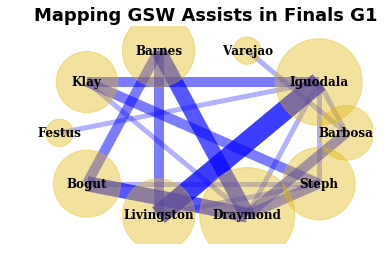

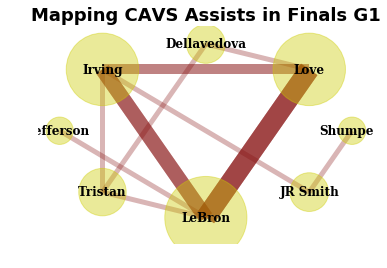

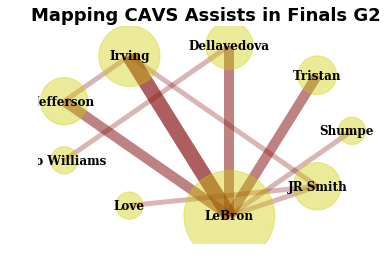

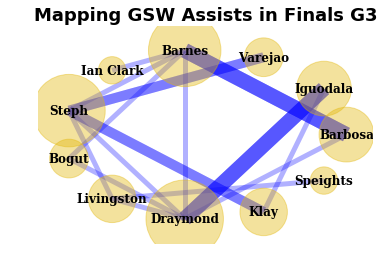

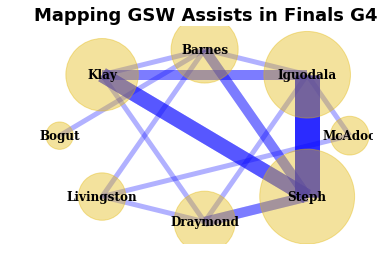

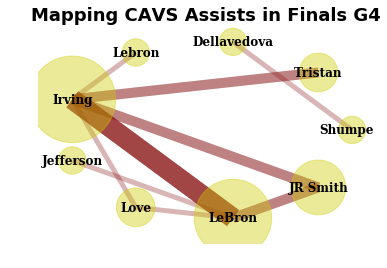

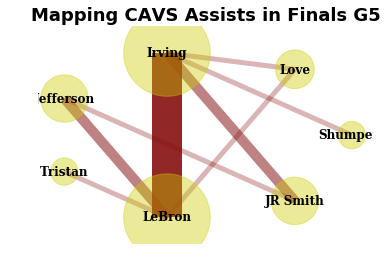

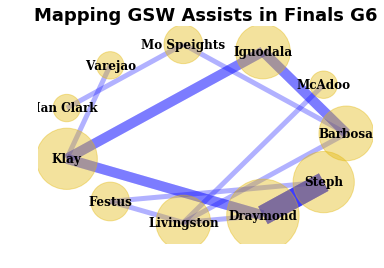

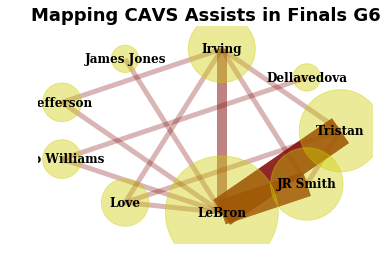

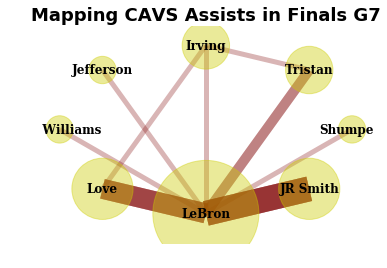

In [111]:
# Load in graphs for both teams from all 7 games
graph1 = read_assists_csv("source assist logs/dubsG1asts.csv")
graph2 = read_assists_csv("source assist logs/cavsG1asts.csv")

graph3 = read_assists_csv("source assist logs/dubsG2asts.csv")
graph4 = read_assists_csv("source assist logs/cavsG2asts.csv")

graph5 = read_assists_csv("source assist logs/dubsG3asts.csv")
graph6 = read_assists_csv("source assist logs/cavsG3asts.csv")

graph7 = read_assists_csv("source assist logs/dubsG4asts.csv")
graph8 = read_assists_csv("source assist logs/cavsG4asts.csv")

graph9 = read_assists_csv("source assist logs/dubsG5asts.csv")
graph10 = read_assists_csv("source assist logs/cavsG5asts.csv")

graph11 = read_assists_csv("source assist logs/dubsG6asts.csv")
graph12 = read_assists_csv("source assist logs/cavsG6asts.csv")

graph13 = read_assists_csv("source assist logs/dubsG7asts.csv")
graph14 = read_assists_csv("source assist logs/cavsG7asts.csv")

# show graphs
draw_graph(graph1, '#E2B70B', 'b', "Mapping GSW Assists in Finals G1")
draw_graph(graph2, '#CCCC00', '#830A0A', "Mapping CAVS Assists in Finals G1")

draw_graph(graph3, '#E2B70B', 'b', "Mapping GSW Assists in Finals G2")
draw_graph(graph4, '#CCCC00', '#830A0A', "Mapping CAVS Assists in Finals G2")

draw_graph(graph5, '#E2B70B', 'b', "Mapping GSW Assists in Finals G3")
draw_graph(graph6, '#CCCC00', '#830A0A', "Mapping CAVS Assists in Finals G3")

draw_graph(graph7, '#E2B70B', 'b', "Mapping GSW Assists in Finals G4")
draw_graph(graph8, '#CCCC00', '#830A0A', "Mapping CAVS Assists in Finals G4")

draw_graph(graph9, '#E2B70B', 'b', "Mapping GSW Assists in Finals G5")
draw_graph(graph10, '#CCCC00', '#830A0A', "Mapping CAVS Assists in Finals G5")

draw_graph(graph11, '#E2B70B', 'b', "Mapping GSW Assists in Finals G6")
draw_graph(graph12, '#CCCC00', '#830A0A', "Mapping CAVS Assists in Finals G6")

draw_graph(graph13, '#E2B70B', 'b', "Mapping GSW Assists in Finals G7")
draw_graph(graph14, '#CCCC00', '#830A0A', "Mapping CAVS Assists in Finals G7")